# The Sparks Foundation Internship
## Data Science and Business Analytics

## Intern: Sayam Kumar 
### #GRIPSEP21

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.set_printoptions(suppress=True,linewidth=150,precision=2)

In [3]:
plt.rcParams["figure.figsize"] = (12,8)

## Import the dataset

In [4]:
data = pd.read_csv('SampleSuperstore.csv')
retail_data = data.copy()
retail_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

## Data Exploration

In [5]:
retail_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## There are no missing values in the whole dataset.


In [6]:
retail_data.drop_duplicates().tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [7]:
retail_data.shape

(9994, 13)

In [8]:
retail_data = retail_data.drop_duplicates()
retail_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [9]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
retail_data.describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

## Detecting Outliers within Data Distributions

In [11]:
def findOutliers(data):
    anomalies = []
    std_data = data.std()
    mean_data = data.mean()
    outlier_cutoff = std_data*3
    lower_limit = mean_data - outlier_cutoff
    upper_limit = mean_data + outlier_cutoff
    #Generate outliers
    for outlier in data:
        if outlier>upper_limit or outlier<lower_limit:
            anomalies.append(outlier)
    return anomalies

In [12]:
sorted(findOutliers(retail_data['Discount']))

[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8

In [13]:
# Function to find outliers using Inter-Quartile Range(IQR) method
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below lower and above upper bound values respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
# Function to find outliers using Z-score method
# def out_zscore(data):
#     global outliers,zscore
#     outliers = []
#     zscore = []
#     threshold = 3
#     mean = np.mean(data)
#     std = np.std(data)
#     for i in data:
#         z_score= (i - mean)/std 
#         zscore.append(z_score)
#         if np.abs(z_score) > threshold:
#             outliers.append(i)
#     return print("Total number of outliers are",len(outliers))

In [14]:
out_iqr(retail_data,'Discount')

The IQR is 0.2
The lower bound value is -0.30000000000000004
The upper bound value is 0.5
Total number of outliers are 855


<AxesSubplot:xlabel='Discount'>

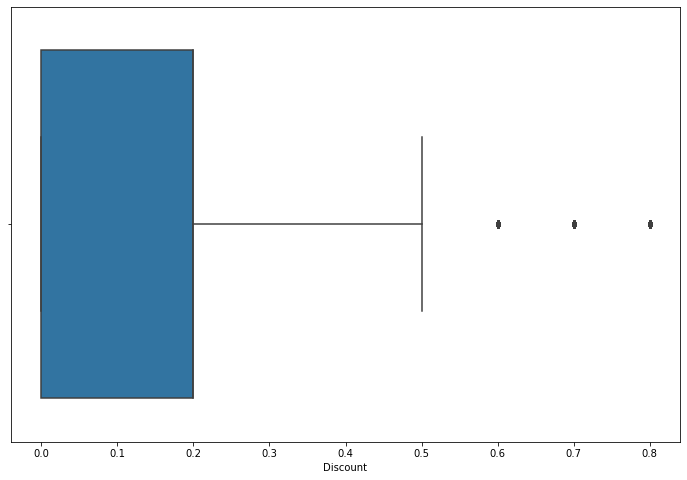

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(retail_data['Discount'])

## As we can see, there are three outlier groups within the data distribution of Discount numerical variables.

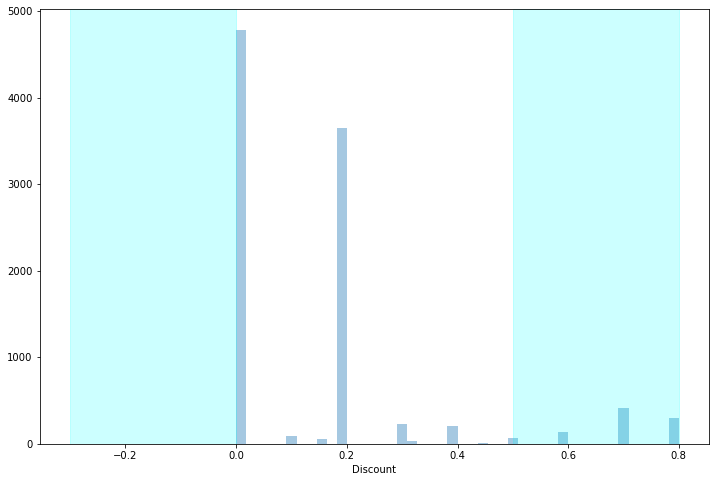

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(retail_data['Discount'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Discount'].min(),alpha=0.2,color='cyan')
plt.axvspan(xmin=upper,xmax=retail_data['Discount'].max(),alpha=0.2,color='cyan')

## Removing Discount Outliers

In [17]:
retail_data = retail_data[(retail_data['Discount']>lower)&(retail_data['Discount']<upper)]
retail_data.sample(10)

Ship Mode      Segment        Country          City         State  \
5862    Second Class     Consumer  United States   Little Rock      Arkansas   
1679  Standard Class    Corporate  United States  Philadelphia  Pennsylvania   
9837  Standard Class     Consumer  United States    Long Beach    California   
6145  Standard Class     Consumer  United States      San Jose    California   
4072    Second Class  Home Office  United States  Indianapolis       Indiana   
8484        Same Day     Consumer  United States       Seattle    Washington   
6522    Second Class     Consumer  United States       Jackson      Michigan   
8069  Standard Class     Consumer  United States    Huntsville         Texas   
5840    Second Class  Home Office  United States     Arlington      Virginia   
5412  Standard Class     Consumer  United States        Clovis    New Mexico   

      Postal Code   Region         Category Sub-Category    Sales  Quantity  \
5862        72209    South  Office Supplies        Paper   19.440         3   
1679        19134     East       Technology       Phones   32.382         3   
9837        90805     West  Office Supplies       Labels   29.600         2   
6145        95123     West  Office Supplies          Art   11.760         4   
4072        46203  Central       Technology      Copiers  999.980         2   
8484        98115     West        Furniture  Furnishings  199.800        10   
6522        49201  Central  Office Supplies        Paper   56.070         7   
8069        77340  Central  Office Supplies      Storage  454.560         5   
5840        22204    South        Furniture  Furnishings   47.980         2   
5412        88101     West       Technology  Accessories  101.340         3   

      Discount    Profit  
5862       0.0    9.3312  
1679       0.4    4.3176  
9837       0.0   14.8000  
6145       0.0    3.1752  
4072       0.0  449.9910  
8484       0.0   71.9280  
6522       0.0   25.2315  
8069       0.2 -107.9580  
5840       0.0   11.0354  
5412       0.0    8.1072

In [18]:
retail_data.shape

(9056, 13)

In [19]:
sorted(findOutliers(retail_data['Sales']))

[2033.584,
 2036.86,
 2054.272,
 2060.744,
 2065.32,
 2079.4,
 2104.55,
 2152.776,
 2154.9,
 2239.936,
 2244.48,
 2249.91,
 2249.91,
 2254.41,
 2275.5,
 2279.96,
 2309.65,
 2314.116,
 2321.9,
 2348.82,
 2357.488,
 2395.2,
 2396.2656,
 2396.4,
 2399.6,
 2399.96,
 2399.96,
 2404.704,
 2405.2,
 2430.08,
 2453.43,
 2479.96,
 2504.74,
 2518.29,
 2519.958,
 2541.98,
 2548.56,
 2563.056,
 2567.84,
 2573.82,
 2575.944,
 2591.56,
 2621.322,
 2625.12,
 2665.62,
 2676.672,
 2678.94,
 2690.97,
 2715.93,
 2735.952,
 2793.528,
 2799.944,
 2799.96,
 2799.96,
 2799.96,
 2799.96,
 2803.92,
 2803.92,
 2807.84,
 2879.952,
 2887.056,
 2888.127,
 2934.33,
 2939.93,
 2973.32,
 2999.95,
 2999.95,
 3023.928,
 3040.0,
 3050.376,
 3059.982,
 3059.982,
 3080.0,
 3149.93,
 3266.376,
 3347.37,
 3357.6,
 3359.952,
 3393.68,
 3404.5,
 3406.664,
 3499.93,
 3504.9,
 3610.848,
 3785.292,
 3812.97,
 3930.072,
 3991.98,
 3999.95,
 4007.84,
 4158.912,
 4164.05,
 4164.05,
 4228.704,
 4297.644,
 4305.552,
 4355.168,
 4367.8

In [20]:
np.sort(findOutliers(retail_data['Profit']),kind='mergesort')

array([-1862.31, -1359.99, -1049.34, -1002.78,  -968.88,  -786.01,  -734.53,  -653.28,  -630.88,  -619.6 ,   673.88,   680.  ,   682.52,   694.5 ,
         700.98,   701.99,   726.56,   735.03,   742.63,   742.63,   743.99,   746.41,   751.76,   751.96,   757.41,   757.41,   762.18,   762.59,
         764.38,   767.2 ,   770.35,   792.27,   793.72,   829.38,   839.99,   843.17,   843.17,   843.17,   874.99,   884.06,   899.98,   909.98,
         942.82,   944.99,   944.99,  1007.98,  1013.13,  1014.98,  1049.98,  1061.57,  1114.51,  1120.  ,  1143.89,  1159.99,  1228.18,  1264.76,
        1270.99,  1276.49,  1351.99,  1371.98,  1379.98,  1415.43,  1416.8 ,  1439.98,  1453.12,  1459.2 ,  1480.47,  1644.29,  1668.2 ,  1906.48,
        1906.48,  1995.99,  2229.02,  2239.99,  2302.97,  2365.98,  2400.97,  2504.22,  2591.96,  2799.98,  3177.47,  3919.99,  4630.48,  4946.37,
        5039.99,  6719.98,  8399.98])

<AxesSubplot:>

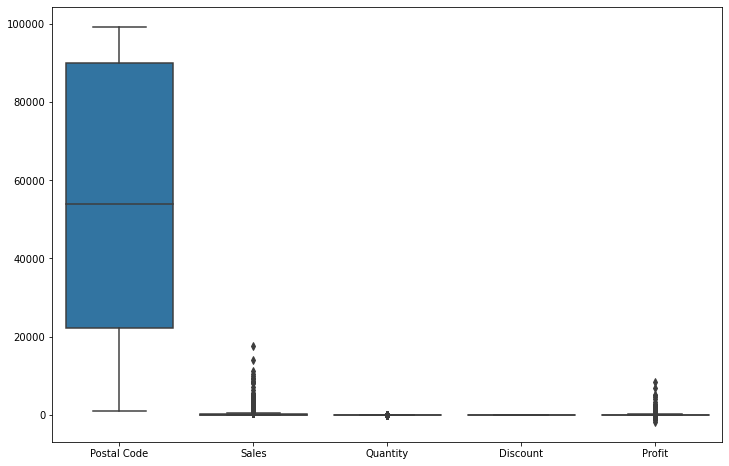

In [21]:
sns.boxplot(data=retail_data)

In [22]:
out_iqr(retail_data,'Sales')

The IQR is 209.864
The lower bound value is -295.116
The upper bound value is 544.34
Total number of outliers are 1017


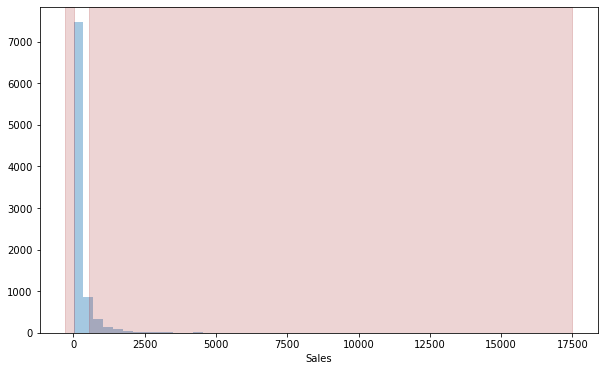

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(retail_data['Sales'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Sales'].min(),alpha=0.2,color='brown')
plt.axvspan(xmin=upper,xmax=retail_data['Sales'].max(),alpha=0.2,color='brown')

## Removing Sales Outliers

In [24]:
retail_data = retail_data[(retail_data['Sales']>lower)&(retail_data['Sales']<upper)]
retail_data.sample(10)

Ship Mode      Segment        Country          City         State  \
9370     First Class    Corporate  United States      Columbus          Ohio   
4706     First Class     Consumer  United States     Waterbury   Connecticut   
9961     First Class  Home Office  United States       Houston         Texas   
1470  Standard Class    Corporate  United States       Detroit      Michigan   
7726  Standard Class     Consumer  United States     Cleveland          Ohio   
3782    Second Class     Consumer  United States       Memphis     Tennessee   
8951  Standard Class     Consumer  United States       Jackson     Tennessee   
2889  Standard Class    Corporate  United States       Seattle    Washington   
2052     First Class     Consumer  United States  Philadelphia  Pennsylvania   
2964    Second Class    Corporate  United States     Oceanside    California   

      Postal Code   Region         Category Sub-Category    Sales  Quantity  \
9370        43229     East        Furniture  Furnishings   41.568         4   
4706         6708     East        Furniture  Furnishings  173.240         4   
9961        77041  Central  Office Supplies        Paper   65.584         2   
1470        48234  Central  Office Supplies        Paper   12.960         2   
7726        44105     East  Office Supplies      Storage  331.536         3   
3782        38109    South  Office Supplies        Paper    8.904         3   
8951        38301    South  Office Supplies      Storage   26.160         3   
2889        98105     West  Office Supplies        Paper   23.850         5   
2052        19134     East  Office Supplies          Art   11.120         5   
2964        92054     West  Office Supplies      Binders   24.320         5   

      Discount   Profit  
9370       0.2  -4.1568  
4706       0.0  17.3240  
9961       0.2  23.7742  
1470       0.0   6.2208  
7726       0.2 -82.8840  
3782       0.2   3.3390  
8951       0.2   1.9620  
2889       0.0  10.7325  
2052       0.2   0.8340  
2964       0.2   8.2080

## Removing Profit Outliers

In [25]:
out_iqr(retail_data,'Profit')

The IQR is 21.005300000000002
The lower bound value is -28.243650000000002
The upper bound value is 55.777550000000005
Total number of outliers are 1119


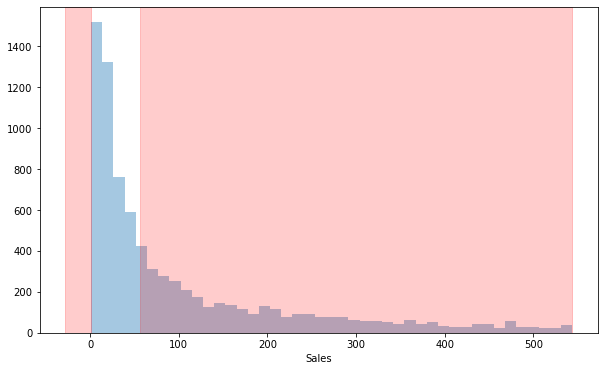

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(retail_data['Sales'],kde=False)
plt.axvspan(xmin=lower,xmax=retail_data['Sales'].min(),alpha=0.2,color='red')
plt.axvspan(xmin=upper,xmax=retail_data['Sales'].max(),alpha=0.2,color='red')

## The box plots suggest that there are several outliers in the data distributions of Sales and Profit numerical variables.

In [27]:
retail_data = retail_data[(retail_data['Profit']>lower)&(retail_data['Profit']<upper)]
retail_data.sample(10)

Ship Mode    Segment        Country             City         State  \
6491  Standard Class  Corporate  United States          Orlando       Florida   
2855  Standard Class   Consumer  United States      Sioux Falls  South Dakota   
6279    Second Class   Consumer  United States          Seattle    Washington   
1828    Second Class  Corporate  United States            Macon       Georgia   
2889  Standard Class  Corporate  United States          Seattle    Washington   
1894     First Class   Consumer  United States  Charlottesville      Virginia   
8604  Standard Class  Corporate  United States      San Antonio         Texas   
2939  Standard Class   Consumer  United States          Seattle    Washington   
6638    Second Class   Consumer  United States    New York City      New York   
4090  Standard Class  Corporate  United States    New York City      New York   

      Postal Code   Region         Category Sub-Category    Sales  Quantity  \
6491        32839    South        Furniture    Bookcases  289.568         2   
2855        57103  Central  Office Supplies       Labels   20.230         7   
6279        98105     West  Office Supplies      Binders   12.816         3   
1828        31204    South  Office Supplies        Paper   38.880         6   
2889        98105     West  Office Supplies        Paper   23.850         5   
1894        22901    South  Office Supplies          Art   34.650         3   
8604        78207  Central       Technology  Accessories  165.600         3   
2939        98105     West  Office Supplies      Binders   59.808         3   
6638        10011     East  Office Supplies      Binders  107.424         6   
4090        10035     East  Office Supplies     Supplies   10.950         3   

      Discount   Profit  
6491       0.2  10.8588  
2855       0.0   9.5081  
6279       0.2   4.1652  
1828       0.0  18.6624  
2889       0.0  10.7325  
1894       0.0  10.3950  
8604       0.2  -6.2100  
2939       0.2  19.4376  
6638       0.2  36.2556  
4090       0.0   3.2850

In [28]:
retail_data.shape

(6920, 13)

## Univariate Analysis

In [29]:
retail_data.head(8)

Ship Mode    Segment        Country             City           State  \
0     Second Class   Consumer  United States        Henderson        Kentucky   
2     Second Class  Corporate  United States      Los Angeles      California   
4   Standard Class   Consumer  United States  Fort Lauderdale         Florida   
5   Standard Class   Consumer  United States      Los Angeles      California   
6   Standard Class   Consumer  United States      Los Angeles      California   
8   Standard Class   Consumer  United States      Los Angeles      California   
9   Standard Class   Consumer  United States      Los Angeles      California   
12  Standard Class   Consumer  United States          Concord  North Carolina   

    Postal Code Region         Category Sub-Category    Sales  Quantity  \
0         42420  South        Furniture    Bookcases  261.960         2   
2         90036   West  Office Supplies       Labels   14.620         2   
4         33311  South  Office Supplies      Storage   22.368         2   
5         90032   West        Furniture  Furnishings   48.860         7   
6         90032   West  Office Supplies          Art    7.280         4   
8         90032   West  Office Supplies      Binders   18.504         3   
9         90032   West  Office Supplies   Appliances  114.900         5   
12        28027  South  Office Supplies        Paper   15.552         3   

    Discount   Profit  
0        0.0  41.9136  
2        0.0   6.8714  
4        0.2   2.5164  
5        0.0  14.1694  
6        0.0   1.9656  
8        0.2   5.7825  
9        0.0  34.4700  
12       0.2   5.4432

## Ship Mode

<AxesSubplot:ylabel='Ship Mode'>

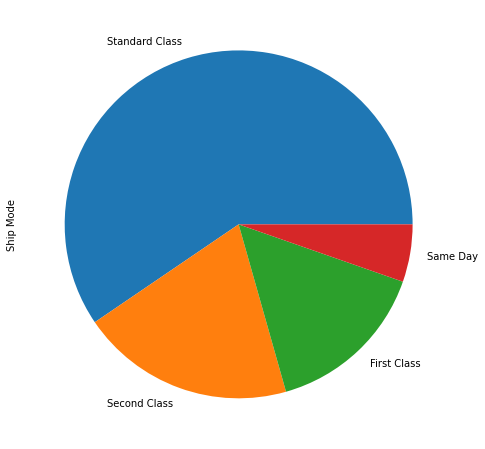

In [30]:
retail_data['Ship Mode'].value_counts().plot(kind='pie')

<AxesSubplot:>

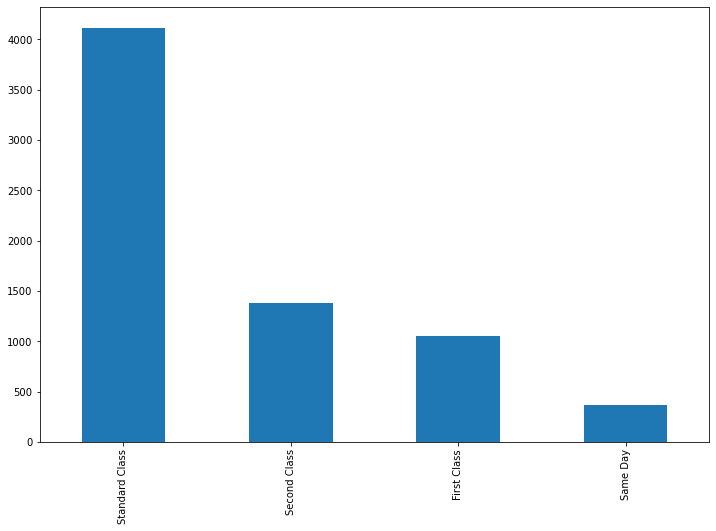

In [31]:
retail_data['Ship Mode'].value_counts().plot(kind='bar')

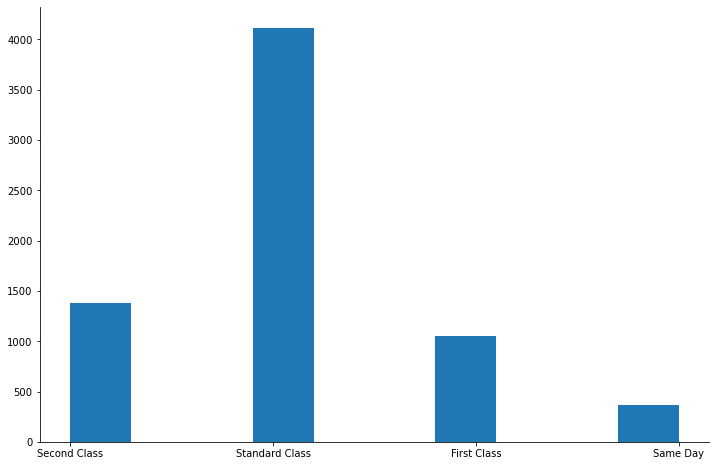

In [32]:
retail_data['Ship Mode'].hist()
sns.despine()
plt.grid(False)

## Most of the retail sales have occurred using "Standard Class" shipping mode, while "Same Day" shipping mode has been used the least.

## Segment

<AxesSubplot:ylabel='Segment'>

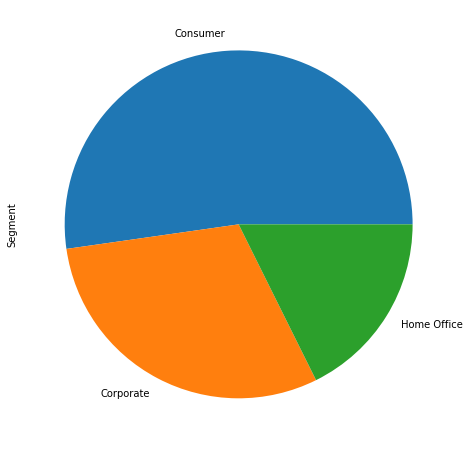

In [33]:
retail_data['Segment'].value_counts().plot(kind='pie')

<AxesSubplot:>

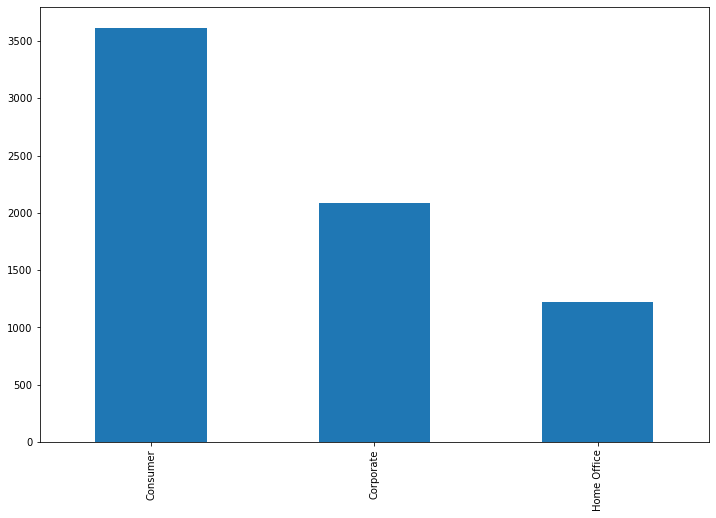

In [34]:
retail_data['Segment'].value_counts().plot(kind='bar')

## As expected, among all the segments, consumers have bought the most number of products, while people of home office bought minimum number of products.

## City

In [35]:
retail_data['City'].value_counts()

New York City    681
Los Angeles      592
San Francisco    401
Seattle          334
Philadelphia     329
                ... 
Layton             1
Rock Hill          1
Redding            1
Manhattan          1
Mason              1
Name: City, Length: 499, dtype: int64

## Maximum retail sales occurred in New York City, while minimum retail sales occurred in Manhattan.
## Insight 1: Price and quantity of each sale must be increased in cities having higher number of sales like New York City, Los Angeles, etc., while number of sales must be improved in cities having low number of sales like Manhattan, Palatine, etc.

In [36]:
retail_data['City'].nunique()

499

## State

In [37]:
retail_data['State'].nunique()

48

In [38]:
retail_data['State'].value_counts()

California              1574
New York                 839
Texas                    547
Washington               393
Pennsylvania             357
Ohio                     298
Florida                  258
Illinois                 248
Michigan                 179
North Carolina           169
Virginia                 157
Arizona                  141
Georgia                  130
Tennessee                127
Colorado                 112
Indiana                  106
Kentucky                  97
New Jersey                95
Massachusetts             91
Oregon                    87
Maryland                  75
Wisconsin                 72
Delaware                  68
Minnesota                 67
Connecticut               62
Missouri                  54
Oklahoma                  43
Arkansas                  42
Alabama                   42
Utah                      41
Rhode Island              39
Mississippi               36
Louisiana                 32
South Carolina            32
Nebraska      

## Insight 2: Number of sales must be increased in states having very low number of sales like Wyoming, West Virginia, etc., whereas for states having maximum number of sales like California, New York, etc., quantity of sales must be enhanced.

## Postal code variable is unnecessary from the context of our analysis so we can drop it from the dataset.

In [39]:
retail_data.drop(['Postal Code'],axis=1,inplace=True)

In [40]:
retail_data.shape

(6920, 12)

In [41]:
retail_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   

  Region         Category Sub-Category    Sales  Quantity  Discount   Profit  
0  South        Furniture    Bookcases  261.960         2       0.0  41.9136  
2   West  Office Supplies       Labels   14.620         2       0.0   6.8714  
4  South  Office Supplies      Storage   22.368         2       0.2   2.5164  
5   West        Furniture  Furnishings   48.860         7       0.0  14.1694  
6   West  Office Supplies          Art    7.280         4       0.0   1.9656

## Region

In [42]:
retail_data['Region'].value_counts()

West       2434
East       1960
Central    1404
South      1122
Name: Region, dtype: int64

<AxesSubplot:ylabel='Region'>

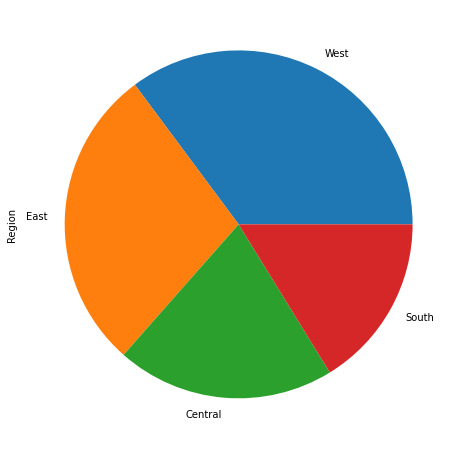

In [43]:
retail_data['Region'].value_counts().plot(kind='pie')

<AxesSubplot:>

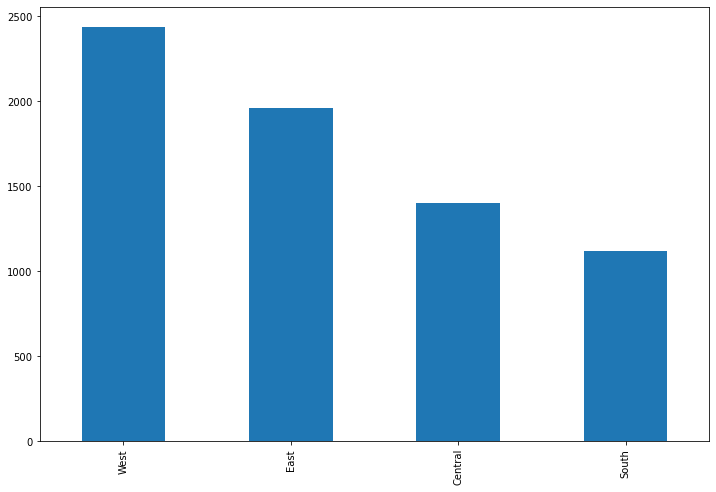

In [44]:
retail_data['Region'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of Sales per Region')

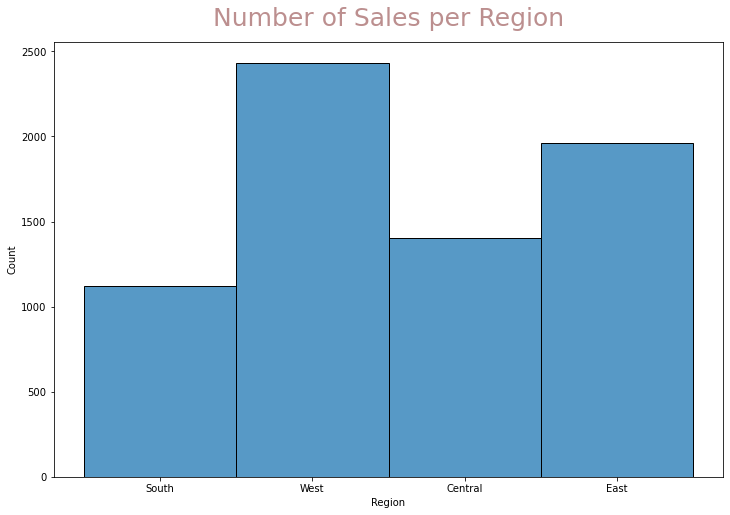

In [45]:
sns.histplot(x=retail_data['Region'])
plt.title('Number of Sales per Region',fontsize=25,color='rosybrown',pad=16)

## Maximum sales have occurred in the West region, while minimum sales have occurred in the South region.

## Category

In [46]:
retail_data['Category'].value_counts()

Office Supplies    4593
Furniture          1194
Technology         1133
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

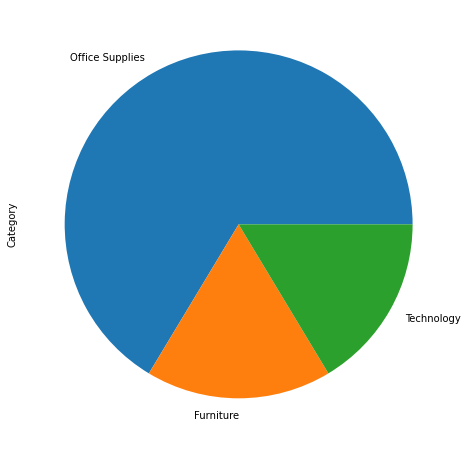

In [47]:
retail_data.Category.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Count per Category')

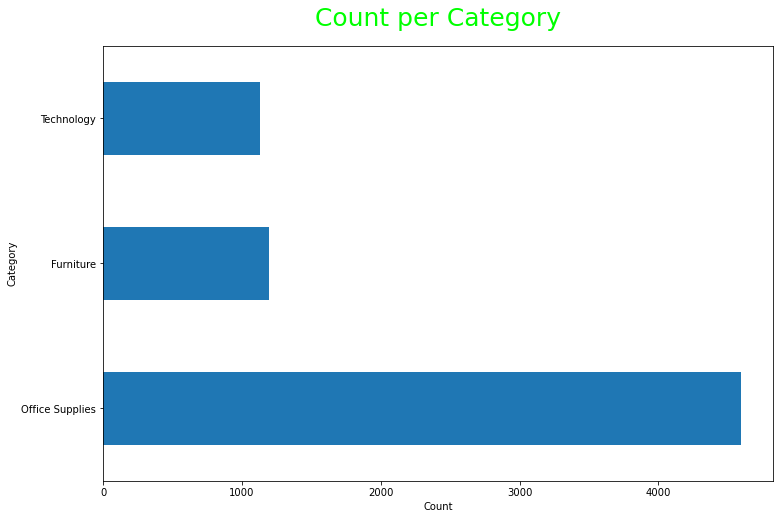

In [48]:
retail_data.Category.value_counts().plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Count per Category',fontsize=25,color='lime',pad=20)

<AxesSubplot:>

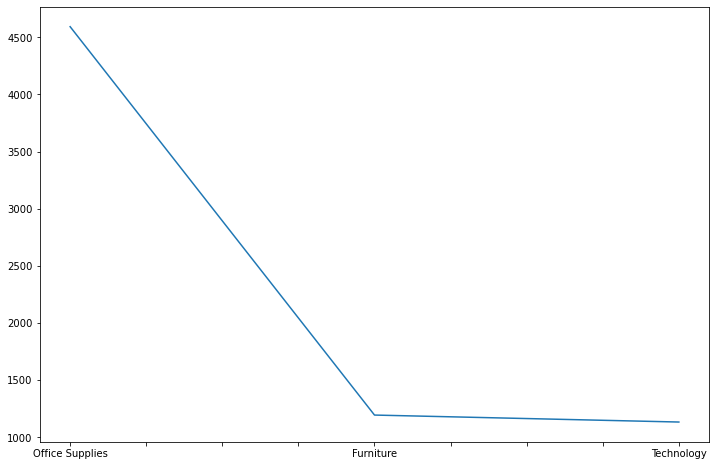

In [49]:
retail_data.Category.value_counts().plot(kind='line')

## Office Supplies had the maximum number of sales, while technology sector had the minimum number of sales.

Text(0.5, 1.0, 'Sales per Category')

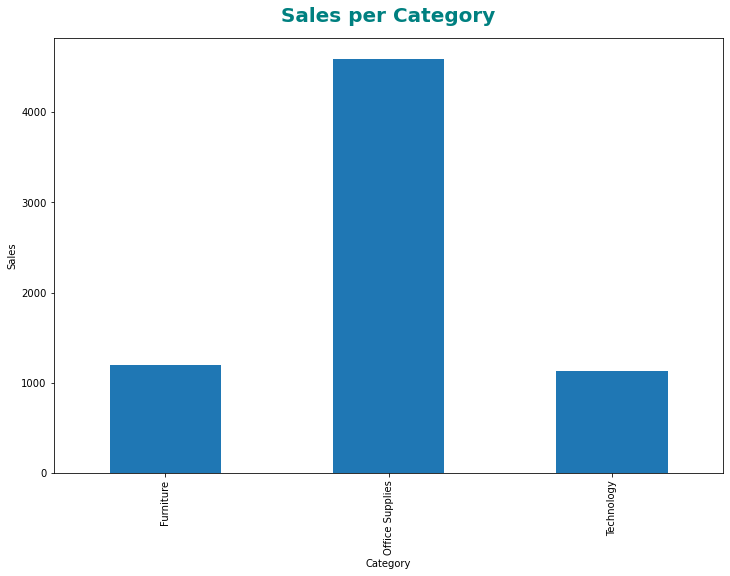

In [50]:
retail_data.groupby('Category')['Sales'].count().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales per Category',fontsize=20,color='teal',pad=16,fontweight='bold')

Text(0.5, 1.0, 'Profit per Category')

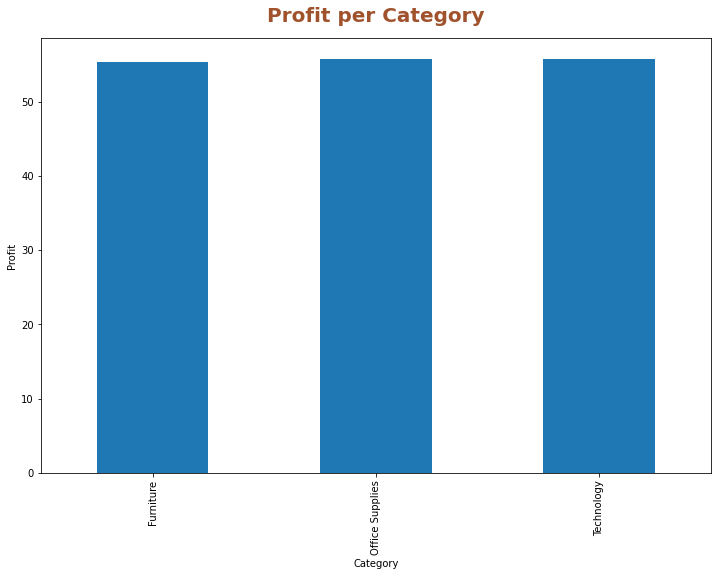

In [51]:
retail_data.groupby('Category')['Profit'].max().plot(kind='bar')
plt.ylabel('Profit')
plt.title('Profit per Category',fontsize=20,color='sienna',pad=16,fontweight='bold')

## Insight 3: Sales must be increased for the Technology sector in order to maximise profit.

Text(0.5, 1.0, 'Discount per Category')

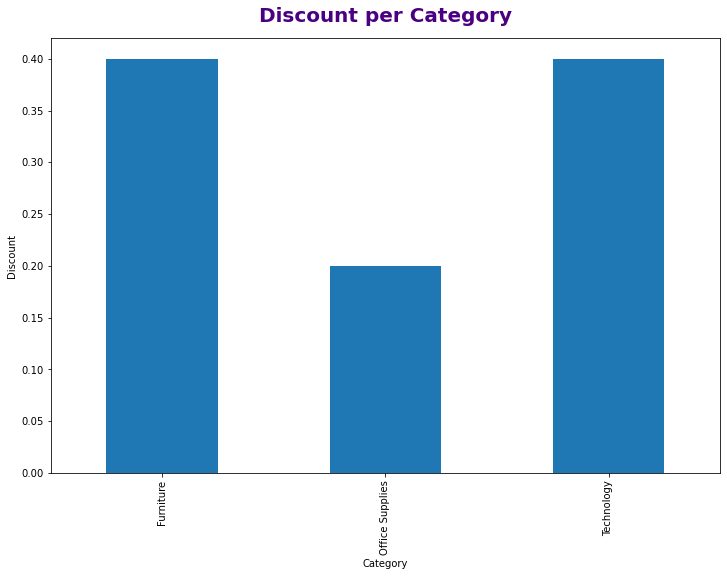

In [52]:
retail_data.groupby('Category')['Discount'].max().plot(kind='bar')
plt.ylabel('Discount')
plt.title('Discount per Category',fontsize=20,color='indigo',pad=16,fontweight='bold')

In [53]:
retail_data.groupby('Category')['Discount'].value_counts().sort_values(ascending=False)

Category         Discount
Office Supplies  0.00        2615
                 0.20        1968
Technology       0.20         616
Furniture        0.00         580
Technology       0.00         461
Furniture        0.20         439
                 0.30          93
Technology       0.40          55
Furniture        0.10          36
                 0.15          32
Office Supplies  0.10          10
Furniture        0.32           8
                 0.40           6
Technology       0.30           1
Name: Discount, dtype: int64

## Insight 4: Quantity of sales for Office Supplies must be increased in order to maximize total profit as they generate minimum discount.

## Sub-Category

In [54]:
retail_data['Sub-Category'].value_counts()

Paper          1200
Art             781
Binders         770
Furnishings     728
Storage         610
Accessories     564
Phones          553
Labels          348
Chairs          297
Appliances      280
Envelopes       217
Fasteners       217
Supplies        170
Bookcases        99
Tables           70
Machines         16
Name: Sub-Category, dtype: int64

In [55]:
retail_data['Sub-Category'].describe()

count      6920
unique       16
top       Paper
freq       1200
Name: Sub-Category, dtype: object

## Binders sub-category has had the maximum number of sales among a total of 17 unique sub-categories.

Text(0.5, 1.0, 'Sales per Sub-Category')

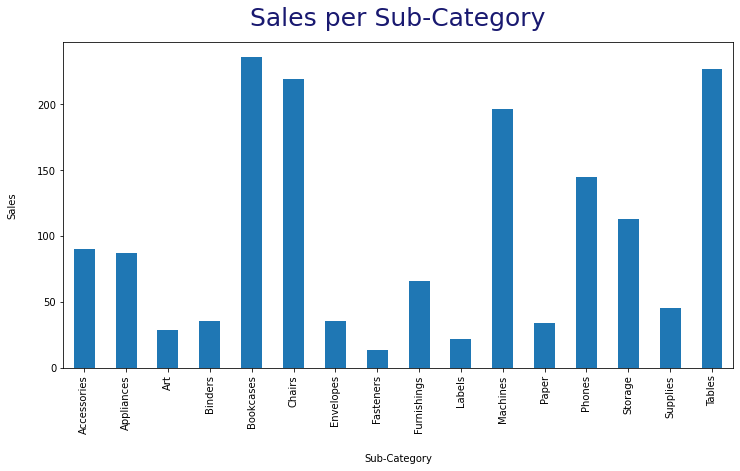

In [56]:
plt.figure(figsize=(12,6))
retail_data.groupby('Sub-Category')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales',labelpad=20)
plt.xlabel('Sub-Category',labelpad=20)
plt.title('Sales per Sub-Category',fontsize=25,color='midnightblue',pad=16)

## At an average, Copiers sub-category generates maximum sales amount, while Fasteners generate minimum sales amount.

In [57]:
retail_data.groupby('Sub-Category')['Profit'].max().sort_values(ascending=False)

Sub-Category
Paper          55.7640
Phones         55.7450
Binders        55.5822
Furnishings    55.3896
Appliances     55.3616
Tables         54.7756
Accessories    54.7425
Bookcases      54.7136
Chairs         54.6660
Art            54.5844
Storage        54.5832
Machines       53.2720
Labels         51.8000
Envelopes      51.7590
Supplies       36.8130
Fasteners      21.8880
Name: Profit, dtype: float64

## Insight 5: Quantity of sales for Copiers sub-category should be enhanced as much as possible as they generate maximum profit.

## Sales

In [58]:
np.max(retail_data['Sales'])

544.008

In [59]:
np.min(retail_data['Sales'])

0.99

In [60]:
np.median(retail_data['Sales'])

35.97

In [61]:
np.std(retail_data['Sales'])

92.37123524096097

In [62]:
np.percentile(retail_data['Sales'],90)

186.54

In [63]:
np.quantile(retail_data['Sales'],0.6).round(2)

50.0

In [64]:
np.round(np.mean(retail_data['Sales']),2)

71.86

In [65]:
retail_data['Sales'].skew()

2.424875076544606

In [66]:
retail_data['Sales'].kurtosis()

6.368851206451053

## High value of kurtosis suggests that there are many outliers present in the distribution of "Sales" numerical variable.

Text(0.5, 0, 'Sales')

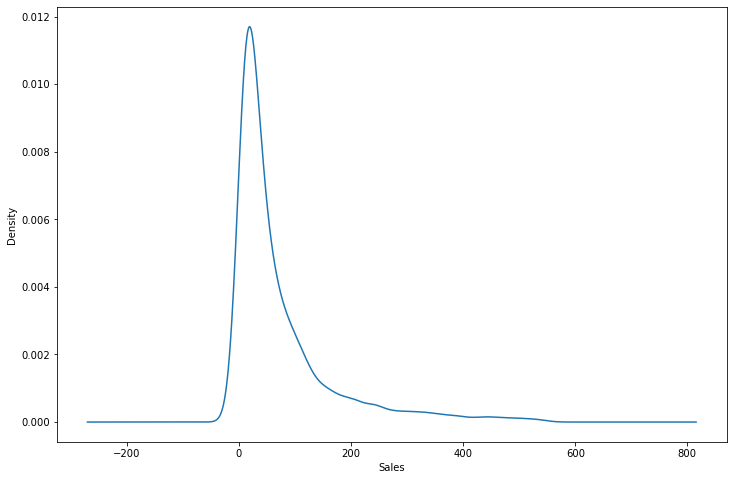

In [67]:
retail_data['Sales'].plot(kind='kde')
plt.xlabel('Sales')

## The distributon of sales numerical variable is positively skewed, i.e. it's tail is longer from the right side.

## Quantity

Text(0.5, 1.0, 'Frequency distribution of Quantity')

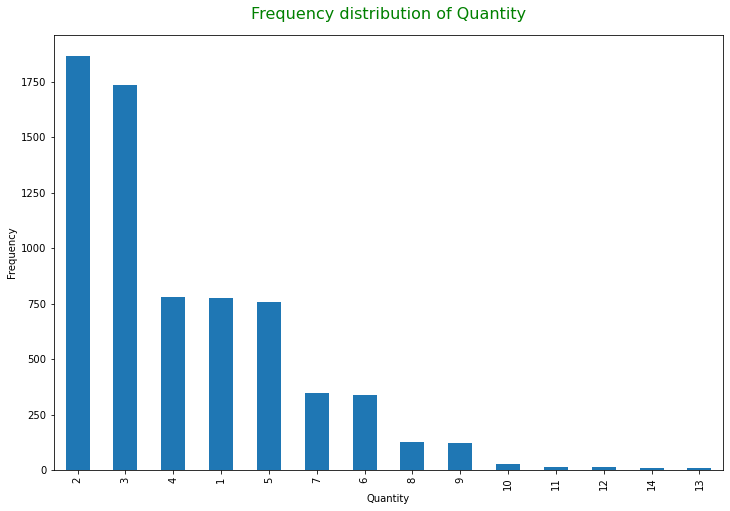

In [68]:
plt.figure(figsize=(12,8))
retail_data['Quantity'].value_counts().plot(kind='bar')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Quantity',fontsize=16,color='green',pad=16)

## Most of the products have been sold in quantities of 2 or 3.

In [69]:
np.round(np.mean(retail_data['Quantity']))

3.0

## At an average, nearly 4 quantities of each sales category have been generated.

In [70]:
np.max(retail_data['Quantity'])

14

In [71]:
np.min(retail_data['Quantity'])

1

In [72]:
retail_data['Quantity'].skew().round(2)

1.33

In [73]:
retail_data['Quantity'].kurtosis().round(2)

2.18

## Discount

In [74]:
retail_data['Discount'].max()

0.4

In [75]:
retail_data['Discount'].min()

0.0

In [76]:
retail_data['Discount'].skew()

0.32527379264512474

In [77]:
retail_data['Discount'].kurtosis()

-1.3881467915130135

In [78]:
np.round(retail_data['Discount'].mean(),2)

0.1

## For an average sale, atleast 16% discount has been provided.

In [79]:
np.round(retail_data['Discount'].std(),2)

0.11

In [80]:
np.round(retail_data['Discount'].median(),2)

0.0

Text(0.5, 0, 'Discount')

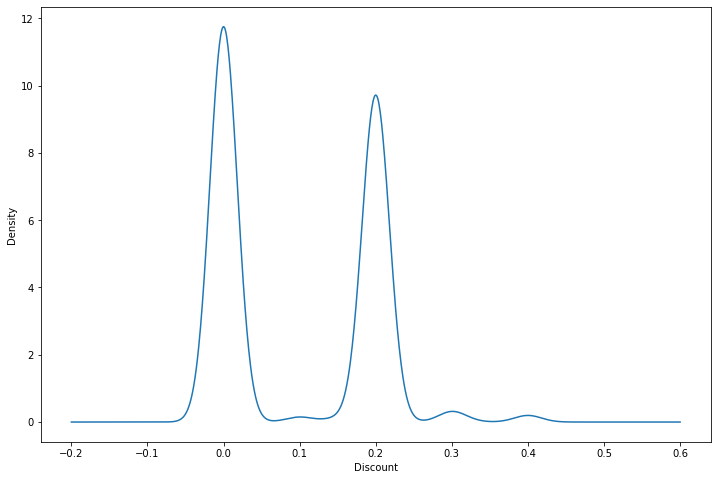

In [81]:
retail_data['Discount'].plot(kind='kde')
plt.xlabel('Discount')

In [82]:
retail_data['Discount'].unique()

array([0.  , 0.2 , 0.3 , 0.1 , 0.4 , 0.15, 0.32])

## Profit

In [83]:
np.round(np.mean(retail_data['Profit']),2)

12.13

In [84]:
np.round(np.max(retail_data['Profit']),2)

55.76

In [85]:
np.round(np.min(retail_data['Profit']),2)

-28.22

In [86]:
np.round(np.median(retail_data['Profit']),2)

8.19

In [87]:
np.round(np.std(retail_data['Profit']),2)

14.2

In [88]:
np.round(np.var(retail_data['Profit']),2)

201.56

In [89]:
np.round(np.sum(retail_data['Profit']),2)

83937.84

## Total profit obtained from all retail sales is $286,241.42.

In [90]:
retail_data['Profit'].skew()

0.8791905122920104

In [91]:
retail_data['Profit'].kurtosis()

1.068063760099479

Text(0.5, 0, 'Profit')

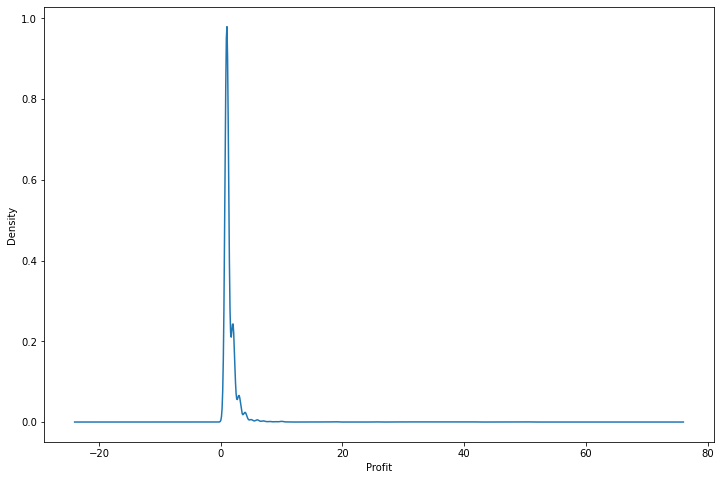

In [92]:
retail_data['Profit'].value_counts().plot(kind='kde')
plt.xlabel('Profit')

## The distribution of Profit numerical variable is right-skewed.

## Bivariate Analysis

In [93]:
retail_data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   

  Region         Category Sub-Category    Sales  Quantity  Discount   Profit  
0  South        Furniture    Bookcases  261.960         2       0.0  41.9136  
2   West  Office Supplies       Labels   14.620         2       0.0   6.8714  
4  South  Office Supplies      Storage   22.368         2       0.2   2.5164  
5   West        Furniture  Furnishings   48.860         7       0.0  14.1694  
6   West  Office Supplies          Art    7.280         4       0.0   1.9656

In [94]:
retail_data.corr(method='pearson')

Sales  Quantity  Discount    Profit
Sales     1.000000  0.116573  0.152208  0.388072
Quantity  0.116573  1.000000 -0.008280  0.232795
Discount  0.152208 -0.008280  1.000000 -0.270943
Profit    0.388072  0.232795 -0.270943  1.000000

<AxesSubplot:>

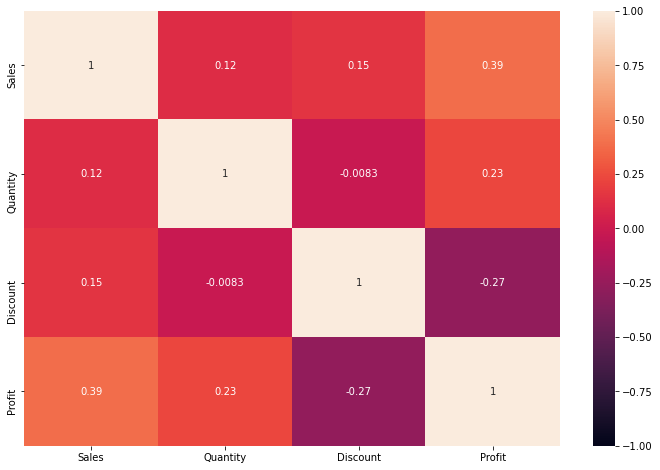

In [95]:
plt.figure(figsize=(12,8))
sns.heatmap(retail_data.corr(),annot=True,vmin=-1,vmax=1)

## Sales and profit are mildly positively correlated, while discount and profit are mildly negatively correlated.

## Insight 6: Focus on increasing the quantity of sales in order to maximize profit.
## Insight 7: Emphasize upon lowering of discounts for almost all the sales in order to enhance profit gains.

Text(0.5, 1.0, 'Effect of Sales on Profit per Category')

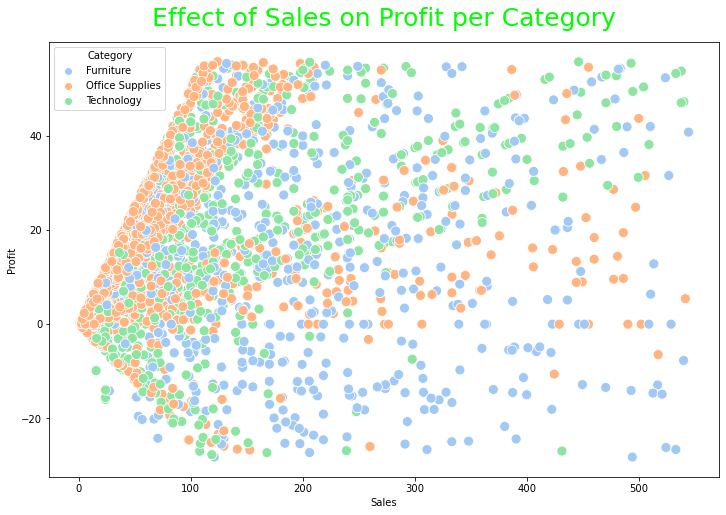

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Sales',y='Profit',data=retail_data,hue='Category',palette='pastel',legend=all,s=100)
plt.title('Effect of Sales on Profit per Category',fontsize=25,color='lime',pad=16)

Text(0.5, 1.0, 'Effect of Sales on Profit')

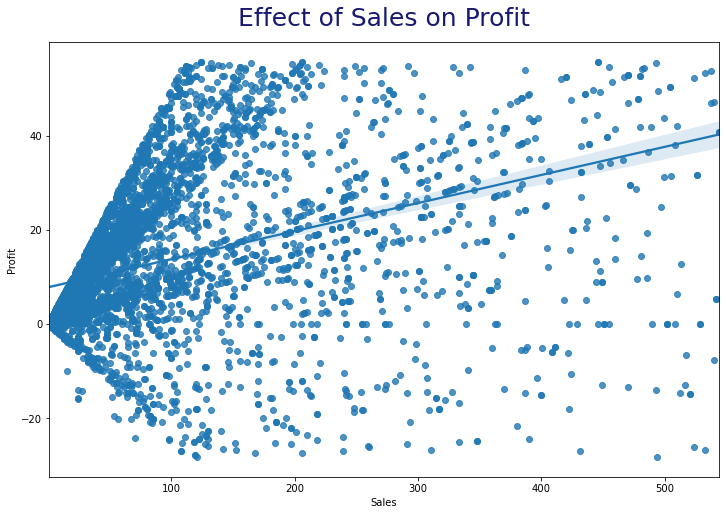

In [97]:
plt.figure(figsize=(12,8))
sns.regplot(x='Sales',y='Profit',data=retail_data)
plt.title('Effect of Sales on Profit',fontsize=25,color='midnightblue',pad=16)

## By the looks of the scatter plot, it seems that sales and profit are moderately positively correlated to each other.

Text(0.5, 1.0, 'Sales vs. Profit')

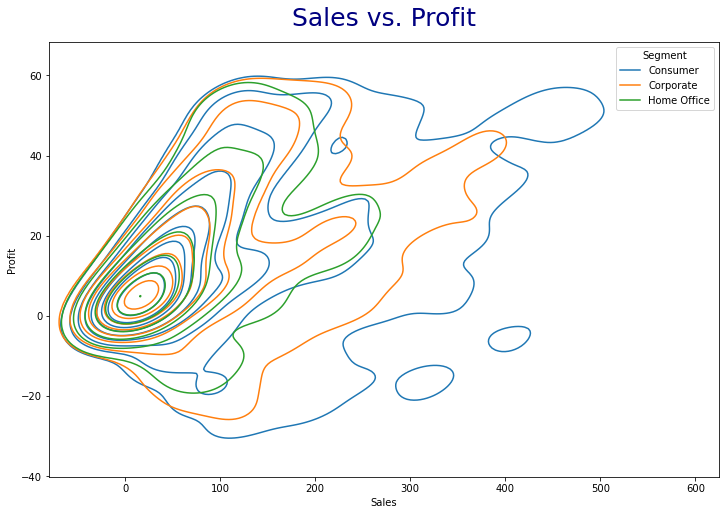

In [98]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Sales',y='Profit',data=retail_data,hue='Segment')
plt.title('Sales vs. Profit',fontsize=25,color='navy',pad=16)

Text(0.5, 1.0, 'Effect of Discount on Profit')

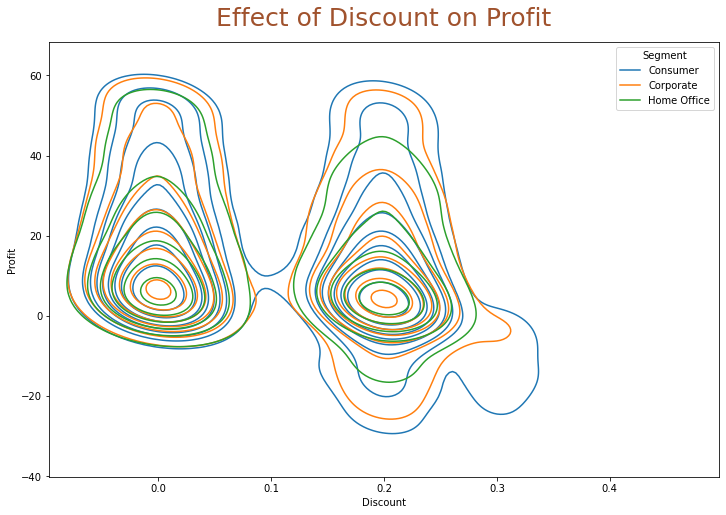

In [99]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Discount',y='Profit',data=retail_data,hue='Segment')
plt.title('Effect of Discount on Profit',fontsize=25,color='sienna',pad=16)

Text(0.5, 1.0, 'Variation of Profit with Discount')

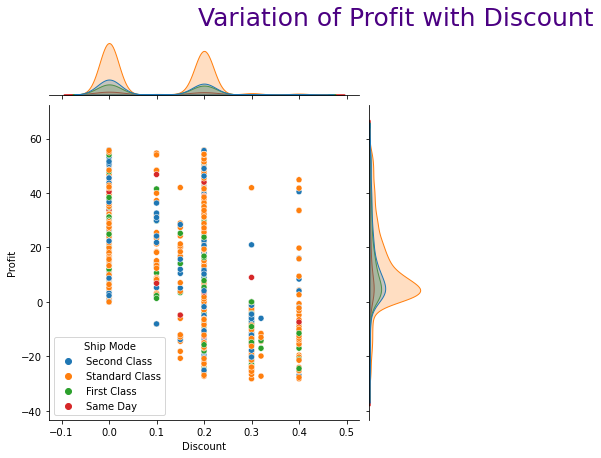

In [100]:
sns.jointplot(x='Discount',y='Profit',data=retail_data,hue='Ship Mode')
plt.title('Variation of Profit with Discount',fontsize=25,color='indigo',pad=80)

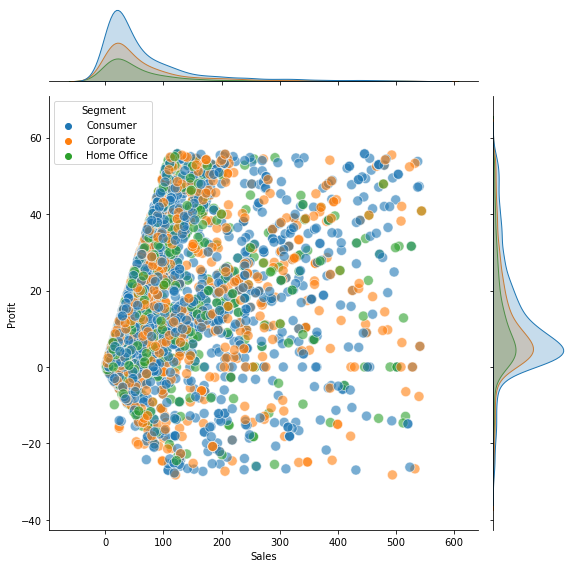

In [101]:
sns.jointplot(x='Sales',y='Profit',data=retail_data,hue='Segment',alpha=0.6,s=100,height=8)

## Value of profit decreases with discount.

# Categorical variables vs. Numerical Variables

## Segment vs. Numerical Variables

Text(0.5, 0, 'Segment')

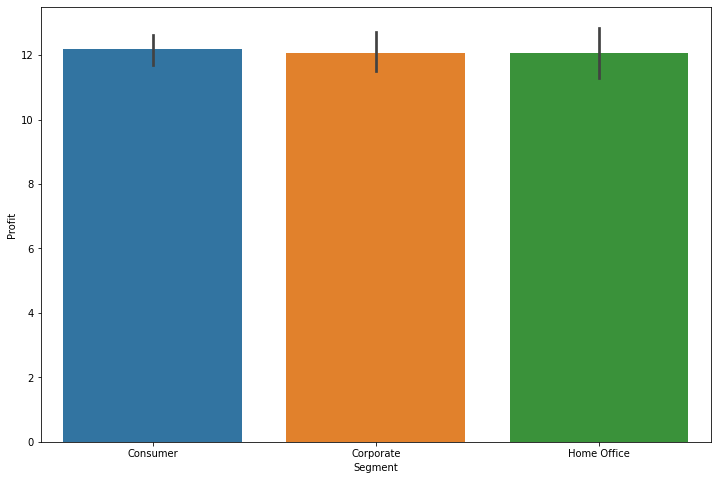

In [102]:
sns.barplot(x='Segment',y='Profit',data=retail_data)
plt.xlabel('Segment')

Text(0, 0.5, 'Profit')

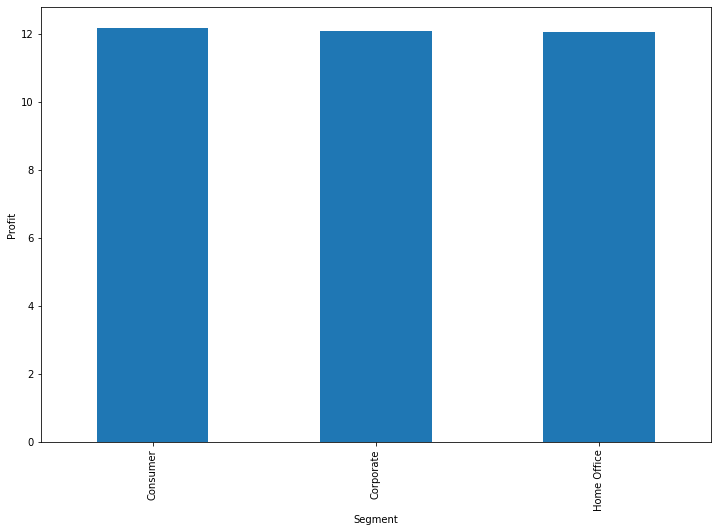

In [103]:
retail_data.groupby('Segment')['Profit'].mean().plot(kind='bar')
plt.ylabel('Profit')

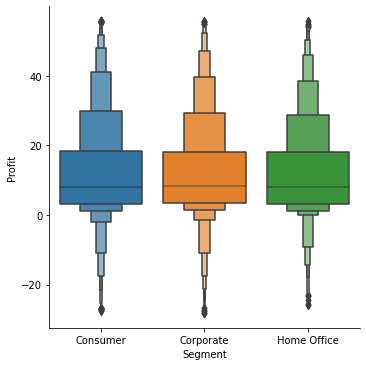

In [104]:
sns.catplot(x='Segment',y='Profit',data=retail_data,kind='boxen')

## At an average, all segments generate the same profit.

Text(0, 0.5, 'Sales')

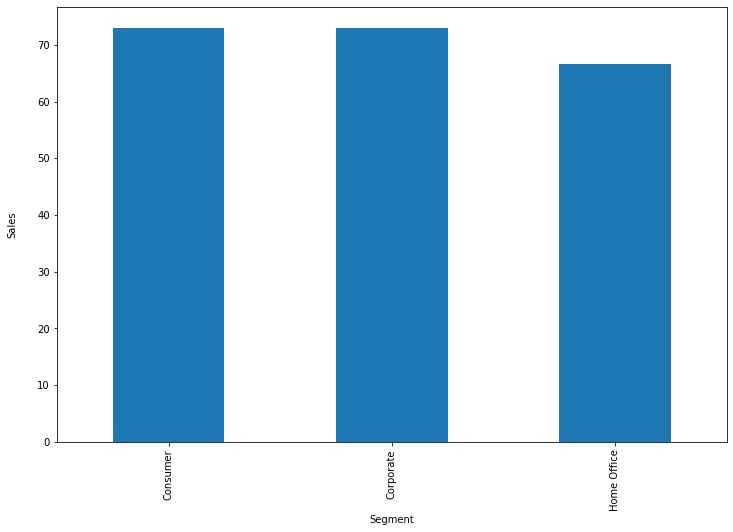

In [105]:
retail_data.groupby('Segment')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales',labelpad=20)

In [106]:
retail_data.groupby('Segment')['Sales'].mean()

Segment
Consumer       73.019488
Corporate      72.906023
Home Office    66.640599
Name: Sales, dtype: float64

## Insight 7: Sales must be increased for the "Home Office" segment. As this segment offers less discount, so there is more probability that it could produce higher profit.

Text(0, 0.5, 'Quantity')

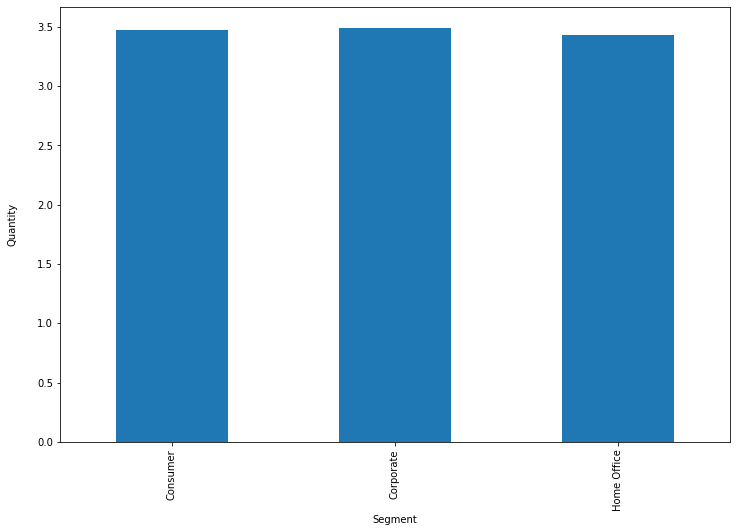

In [107]:
retail_data.groupby('Segment')['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity',labelpad=20)

<AxesSubplot:xlabel='Segment', ylabel='Quantity'>

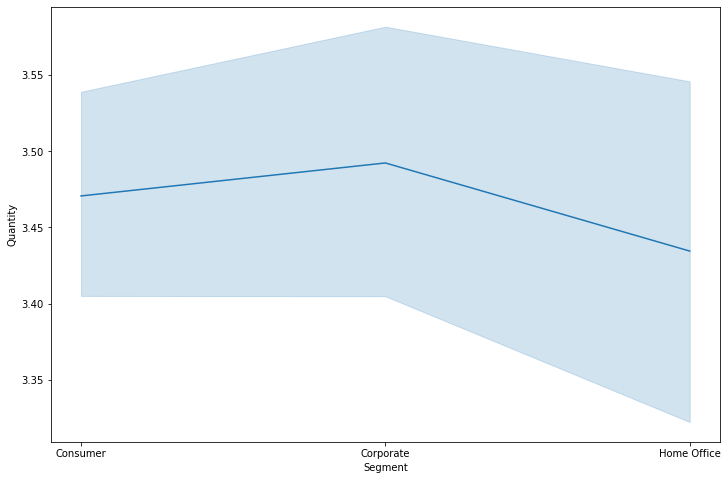

In [108]:
sns.lineplot(x='Segment',y='Quantity',data=retail_data)

In [109]:
retail_data.groupby('Segment')['Quantity'].mean()

Segment
Consumer       3.470686
Corporate      3.492315
Home Office    3.434534
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

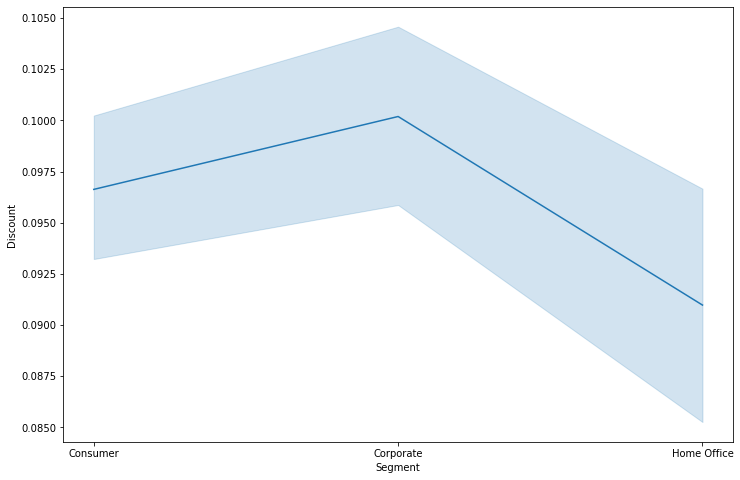

In [110]:
sns.lineplot(x='Segment',y='Discount',data=retail_data)

## Insight 8: For the "Corporate" segment, discount must be reduced in order to enhance profit. Reducing discount for "Consumer" would also help to some extent.

In [111]:
retail_data.groupby('Segment')['Discount'].mean()

Segment
Consumer       0.096626
Corporate      0.100187
Home Office    0.090974
Name: Discount, dtype: float64

## Ship Mode vs. All Numerical Variables

In [112]:
retail_data.groupby('Ship Mode')['Sales'].mean()

Ship Mode
First Class       72.519989
Same Day          66.039714
Second Class      72.611604
Standard Class    71.960722
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

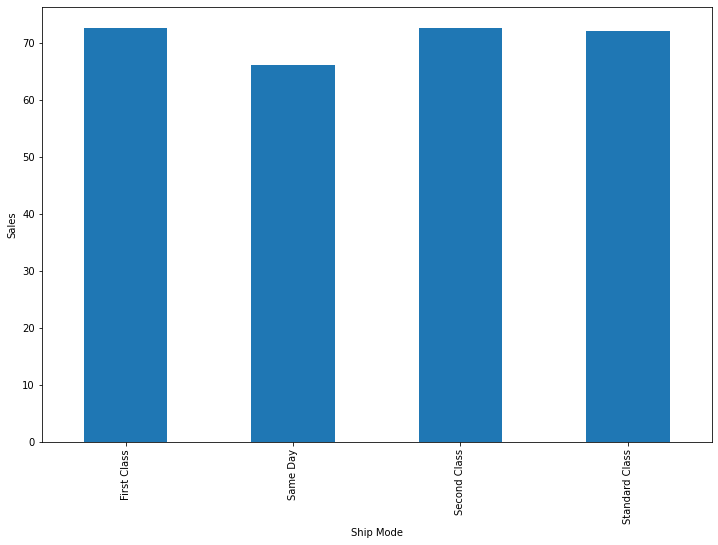

In [113]:
retail_data.groupby('Ship Mode')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales',labelpad=5)

In [114]:
retail_data.groupby('Ship Mode')['Quantity'].mean()

Ship Mode
First Class       3.386364
Same Day          3.224324
Second Class      3.468750
Standard Class    3.515299
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Ship Mode'>

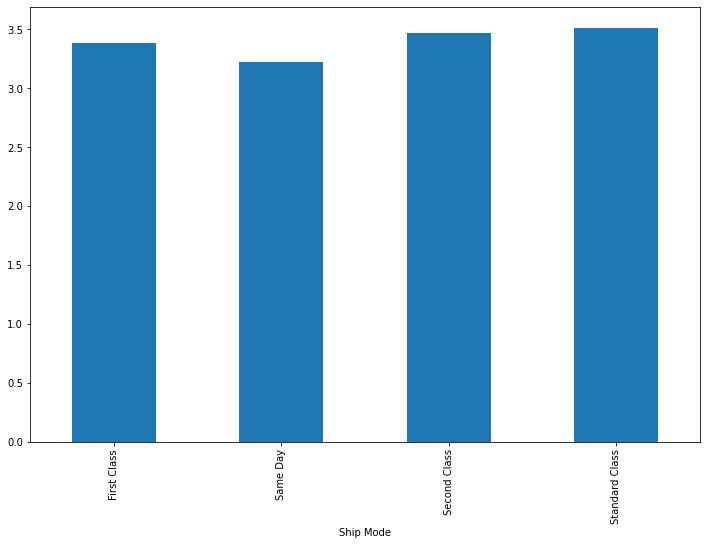

In [115]:
retail_data.groupby('Ship Mode')['Quantity'].mean().plot(kind='bar')

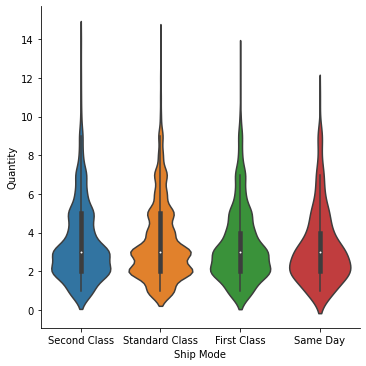

In [116]:
sns.catplot(x='Ship Mode',y='Quantity',data=retail_data,kind='violin')

## Maximum quantity of sales have been supplied by Standard Class shipping mode, while minimum quantity of sales have been supplied by Same Day.

## Insight 9: Sales quantity should be increased for "Same Day" ship mode, as it is lagging behind all other shipping modes, in terms of supply/quantity of sales.

In [117]:
retail_data.groupby('Ship Mode')['Discount'].mean()

Ship Mode
First Class       0.098191
Same Day          0.096757
Second Class      0.090203
Standard Class    0.098482
Name: Discount, dtype: float64

Text(0, 0.5, 'Discount')

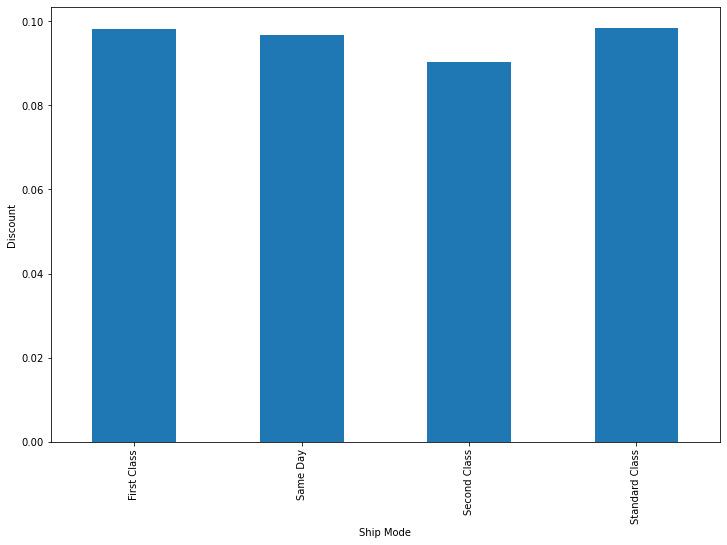

In [118]:
retail_data.groupby('Ship Mode')['Discount'].mean().plot(kind='bar')
plt.ylabel('Discount')

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

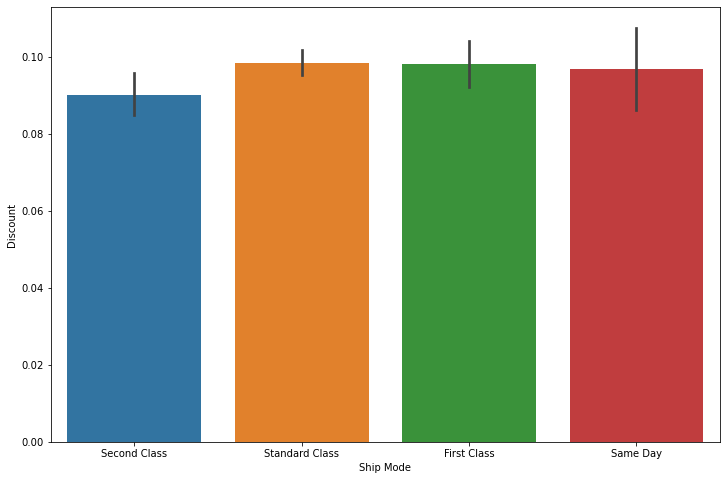

In [119]:
sns.barplot(x='Ship Mode',y='Discount',data=retail_data)

## At an average, sales through standard class offer maximum discount, closely followed by First Class and Same Day shipping modes. Sales through Second Class offer minimum discount.

## Insight 10: If we decrease discount for "Standard Class" and "First Class" shipping modes, then we can achieve more profit.

In [120]:
retail_data.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       12.775509
Same Day          10.871960
Second Class      12.806425
Standard Class    11.851052
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Ship Mode'>

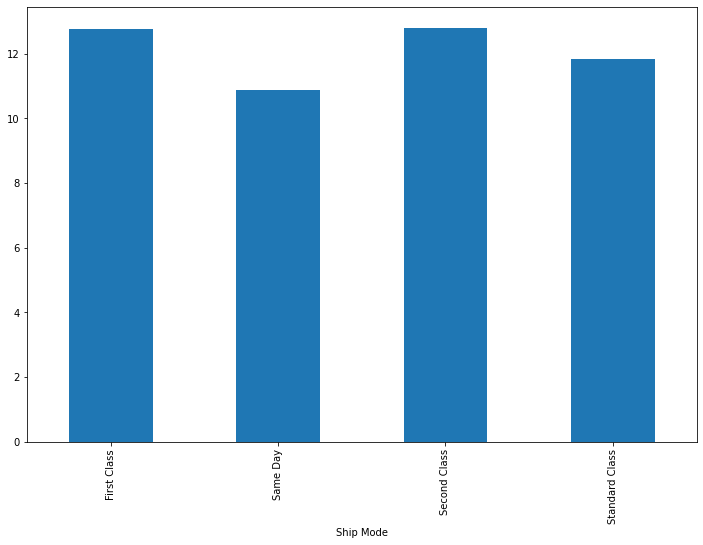

In [121]:
retail_data.groupby('Ship Mode')['Profit'].mean().plot(kind='bar')

Text(0.5, 1.0, 'Profit per Ship Mode')

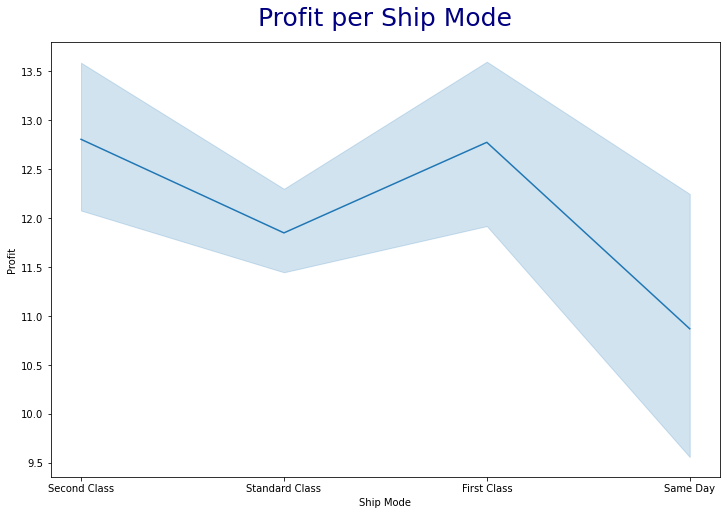

In [122]:
sns.lineplot(x='Ship Mode',y='Profit',data=retail_data,palette='Purples_d')
plt.title('Profit per Ship Mode',fontsize=25,color='navy',pad=16)

Text(0.5, 1.0, 'Profit per Ship Mode')

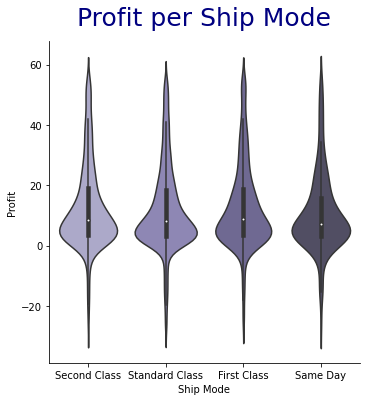

In [123]:
sns.catplot(x='Ship Mode',y='Profit',data=retail_data,kind='violin',palette='Purples_d')
plt.title('Profit per Ship Mode',fontsize=25,color='navy',pad=16)

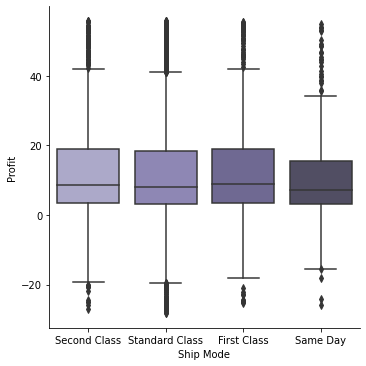

In [124]:
sns.catplot(x='Ship Mode',y='Profit',data=retail_data,kind='box',palette='Purples_d')

## Insight 11: Sales price must be increased for "Second Class" ship mode, as according to the trend, it generates more profit.

## Category vs. All Numerical Variables

Text(0, 0.5, 'Sales')

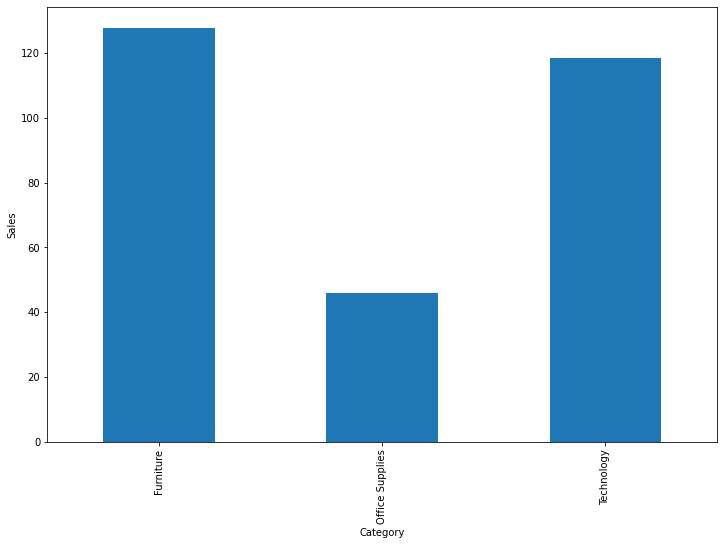

In [125]:
retail_data.groupby('Category')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales')

## Insight 12: Sales price needs to be increased for "Office Supplies" sales category. 

Text(0.5, 1.0, 'Count per Category')

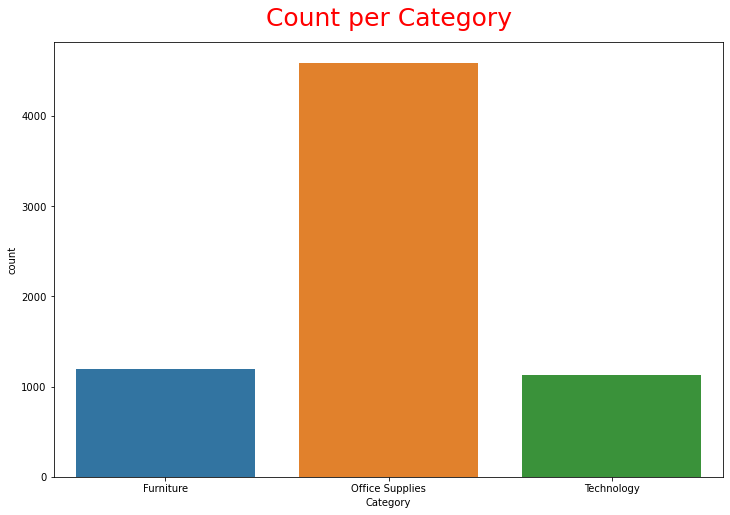

In [126]:
sns.countplot(x=retail_data['Category'])
plt.title('Count per Category',fontsize=25,color='red',pad=16)

Text(0.5, 1.0, 'Quantities generated for each Category')

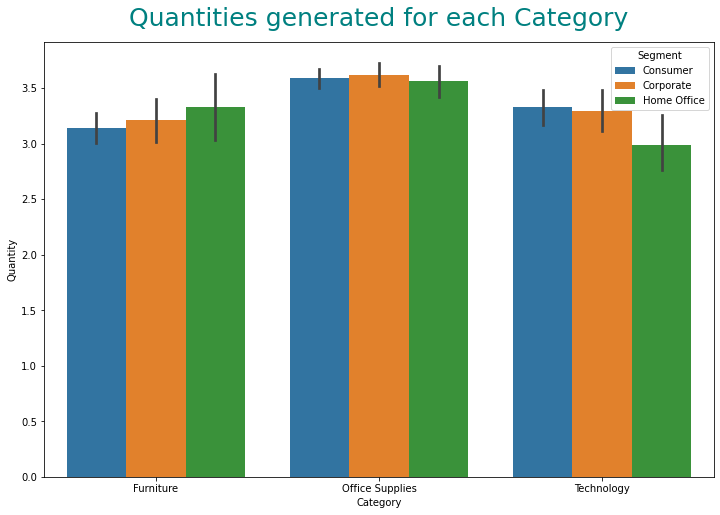

In [127]:
sns.barplot(x='Category',y='Quantity',data=retail_data,hue='Segment')
plt.title('Quantities generated for each Category',fontsize=25,color='teal',pad=16)

Text(0, 0.5, 'Quantity')

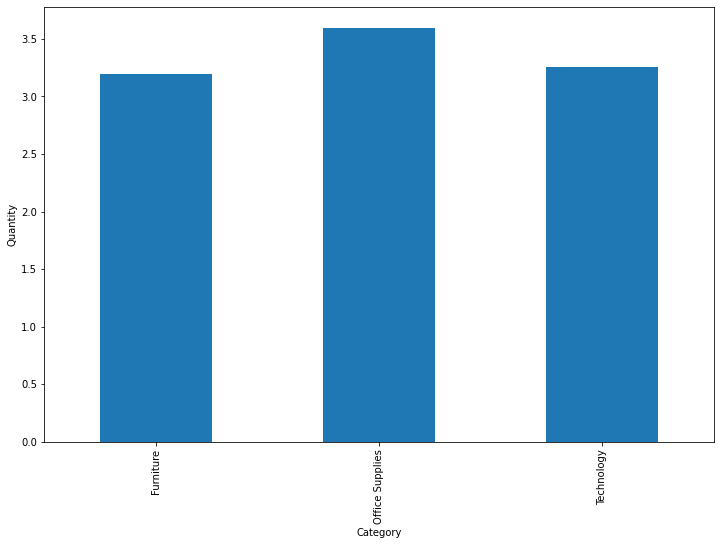

In [128]:
retail_data.groupby('Category')['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

## Insight 13: More quantities of "Furniture" and "Technology" category need to be generated in order to enhance sales revenue.

Text(0.5, 1.0, 'Discount per Category')

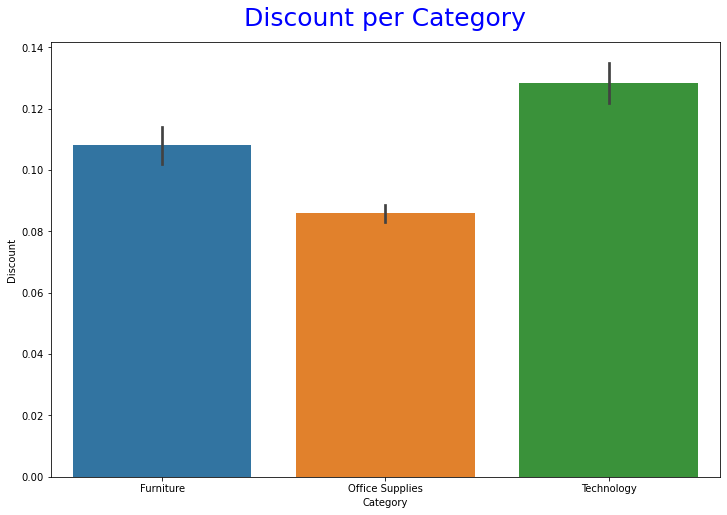

In [129]:
sns.barplot(x='Category',y='Discount',data=retail_data)
plt.title('Discount per Category',fontsize=25,color='blue',pad=16)

<AxesSubplot:xlabel='Category', ylabel='Discount'>

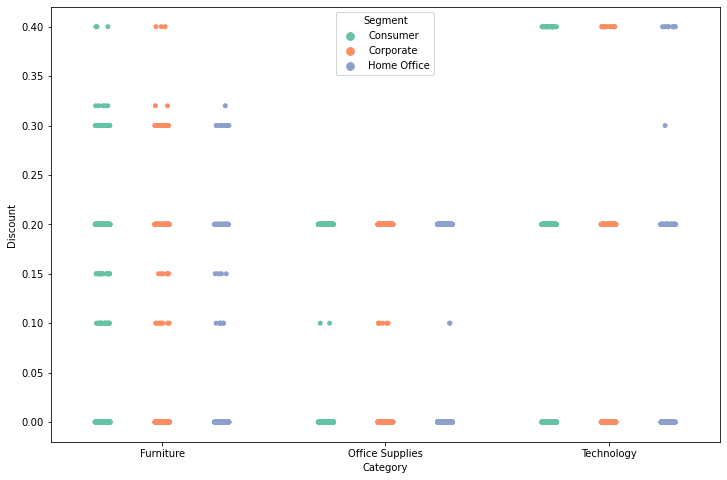

In [130]:
sns.stripplot(x='Category',y='Discount',data=retail_data,hue='Segment',jitter=True,dodge=True,palette='Set2')

In [131]:
retail_data.groupby('Category')['Discount'].mean()

Category
Furniture          0.108090
Office Supplies    0.085913
Technology         0.128420
Name: Discount, dtype: float64

## Insight 14: Discount should be reduced for "Furniture" and "Technology" categories apart from increasing their quantity of sales in order to gain maximum profit.

In [132]:
retail_data.groupby('Category')['Profit'].mean()

Category
Furniture          11.627871
Office Supplies    11.325398
Technology         15.919334
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Profit'>

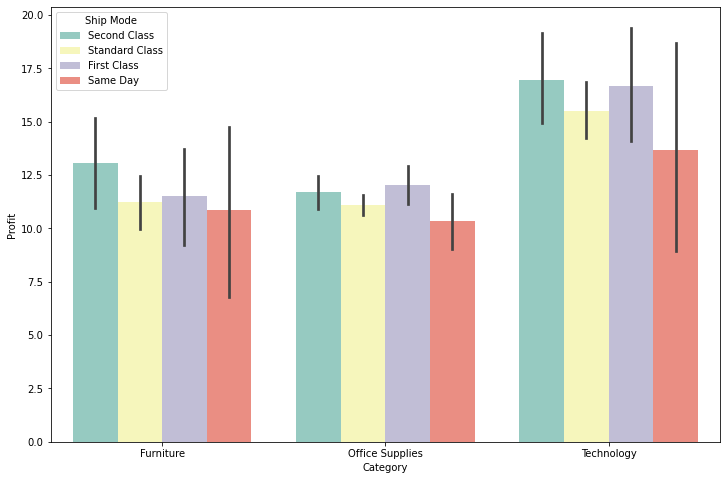

In [133]:
sns.barplot(x='Category',y='Profit',data=retail_data,hue='Ship Mode',palette='Set3')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

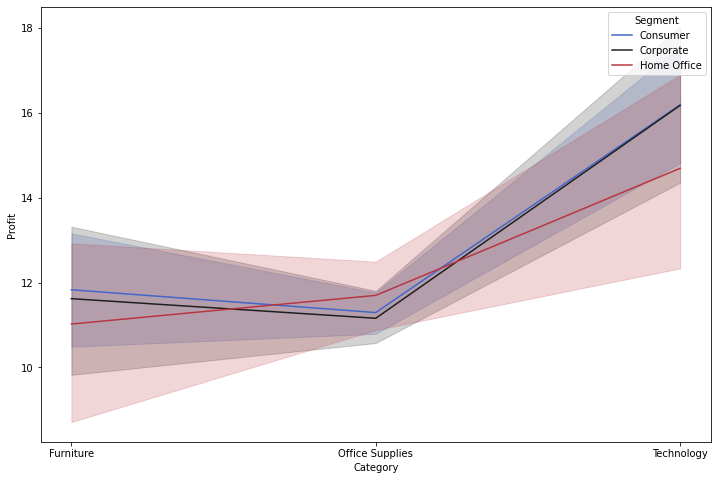

In [134]:
sns.lineplot(x='Category',y='Profit',data=retail_data,hue='Segment',palette='icefire')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

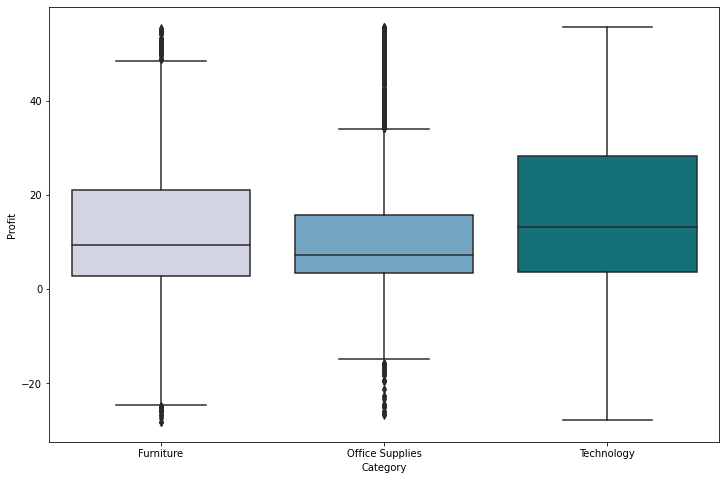

In [135]:
sns.boxplot(x='Category',y='Profit',data=retail_data,palette='PuBuGn')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

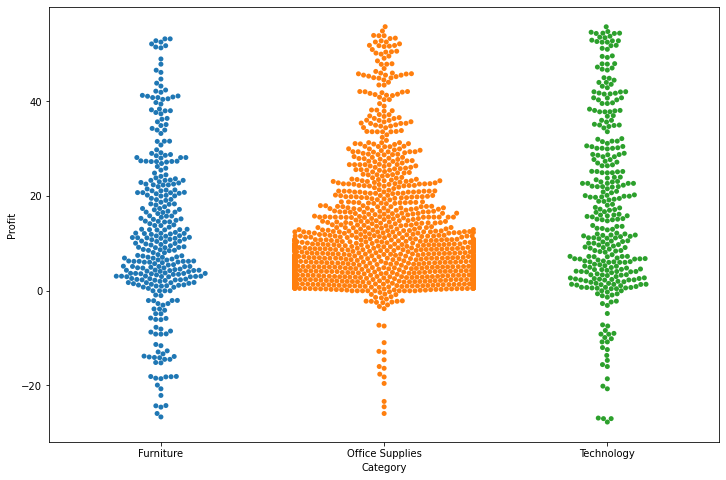

In [136]:
sns.swarmplot(x='Category',y='Profit',data=retail_data[:2000])

## More profit has been generated in the sales within Technology category, while minimum profit has been generated within Office Supplies.

<AxesSubplot:xlabel='Category', ylabel='Proportion'>

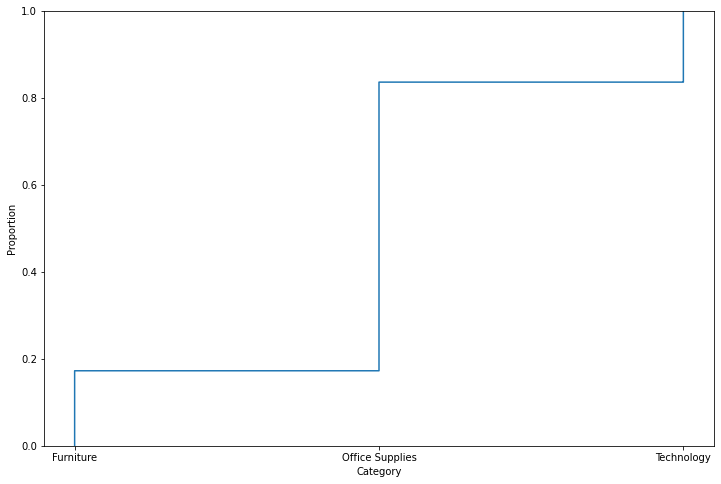

In [137]:
sns.ecdfplot(x='Category',data=retail_data)

## From the above ECDF plot, we can observe that Office Supplies products have been sold the most,while Technology products have been sold the least.

## Sub-Category vs. All Numerical Variables

In [138]:
retail_data.groupby('Sub-Category')['Sales'].mean()

Sub-Category
Accessories     90.258723
Appliances      87.278289
Art             28.905657
Binders         35.569273
Bookcases      235.516216
Chairs         219.192101
Envelopes       35.988221
Fasteners       13.936774
Furnishings     66.255431
Labels          22.203632
Machines       196.714250
Paper           34.212382
Phones         144.530369
Storage        113.164590
Supplies        45.463365
Tables         226.552429
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

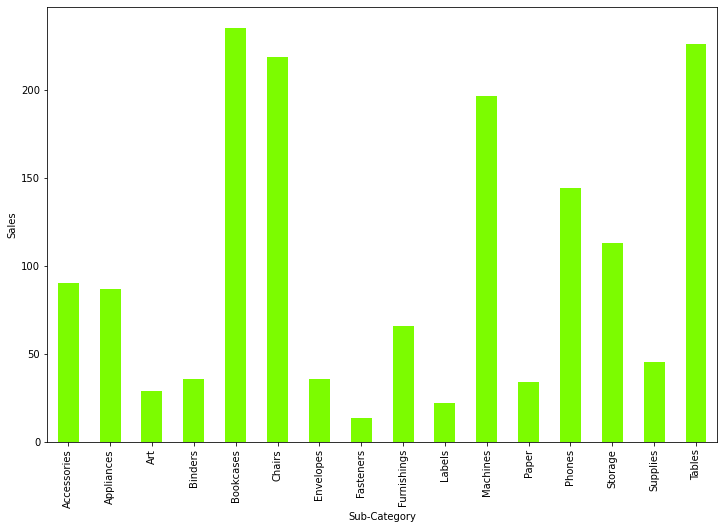

In [139]:
retail_data.groupby('Sub-Category')['Sales'].mean().plot(kind='bar',color='lawngreen')
plt.ylabel('Sales')

## Bookcases have generated maximum sales amount, while Fasteners have generated the minimum.

## Insight 15: More sales must be facilitated for sub-categories producing very low sales amount like fasteners, labels, art, etc.

Text(0.5, 1.0, 'Distribution of Sales per Sub-Category')

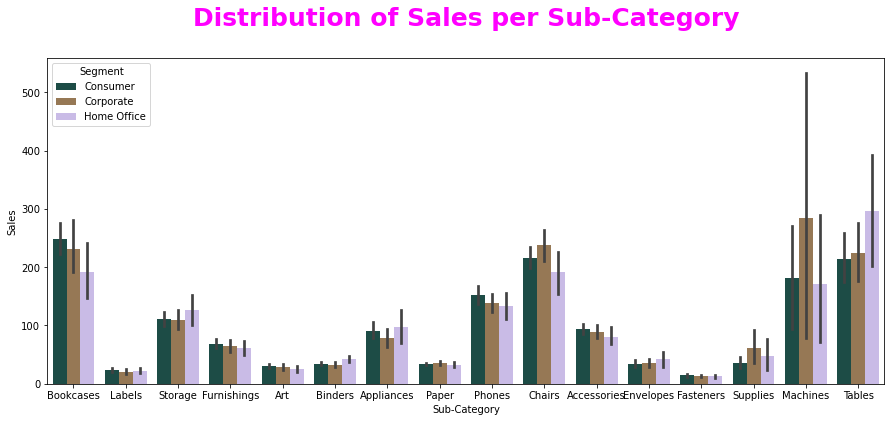

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sub-Category',y='Sales',data=retail_data,hue='Segment',palette='cubehelix')
plt.title('Distribution of Sales per Sub-Category',fontsize=25,fontweight='bold',color='magenta',pad=32)

## Insight 16: For "Tables" and "Storage" sub categories, sales must be increased for the segments "Consumer" and "Corporate".

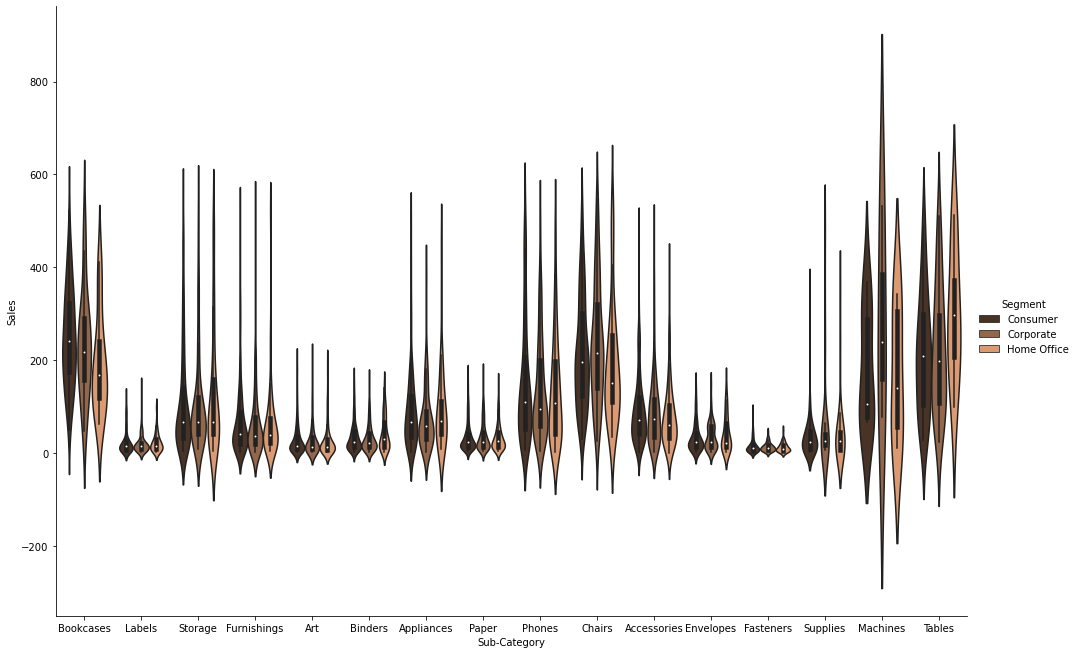

In [141]:
sns.catplot(x='Sub-Category',y='Sales',data=retail_data,hue='Segment',kind='violin',palette='copper',height=9,aspect=1.5)

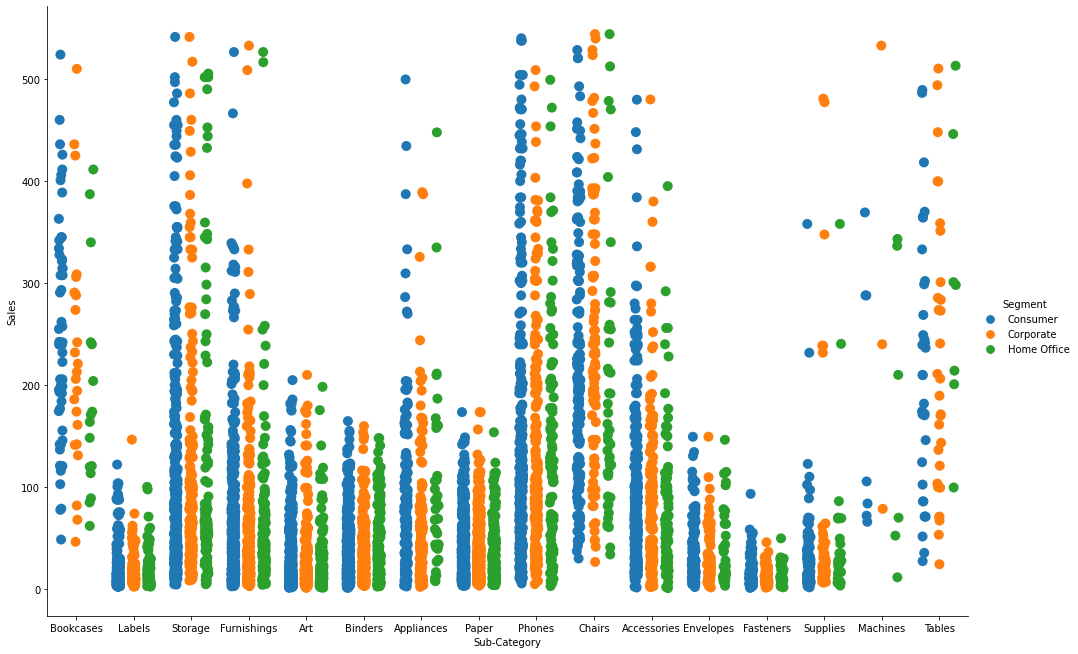

In [142]:
sns.catplot(x='Sub-Category',y='Sales',data=retail_data,kind='strip',height=9,aspect=1.5,hue='Segment',dodge=True,s=10)

In [143]:
retail_data.groupby('Sub-Category')['Quantity'].mean()

Sub-Category
Accessories    3.365248
Appliances     3.367857
Art            3.717029
Binders        3.690909
Bookcases      2.575758
Chairs         2.898990
Envelopes      3.414747
Fasteners      4.211982
Furnishings    3.471154
Labels         3.741379
Machines       3.312500
Paper          3.569167
Phones         3.148282
Storage        3.298361
Supplies       3.376471
Tables         2.414286
Name: Quantity, dtype: float64

Text(0, 0.5, 'Quantity')

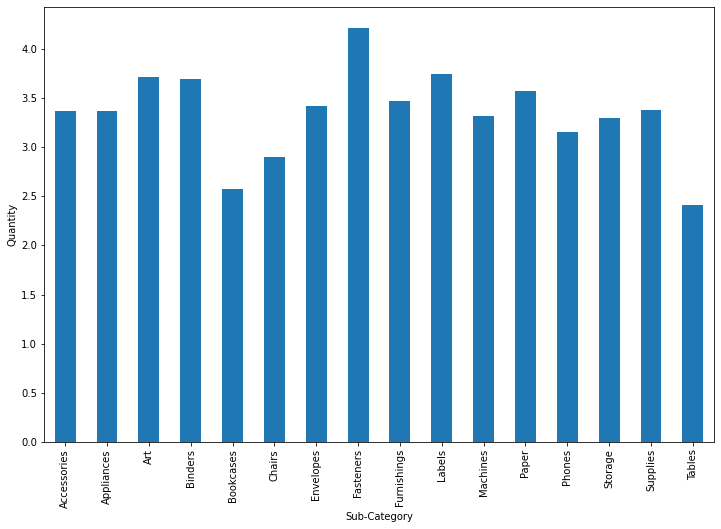

In [144]:
retail_data.groupby('Sub-Category')['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

## Insight 17: Sales quantity should be increased for the sub-categories "Tables" and "Bookcases" in order to boost net sales amount.

<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

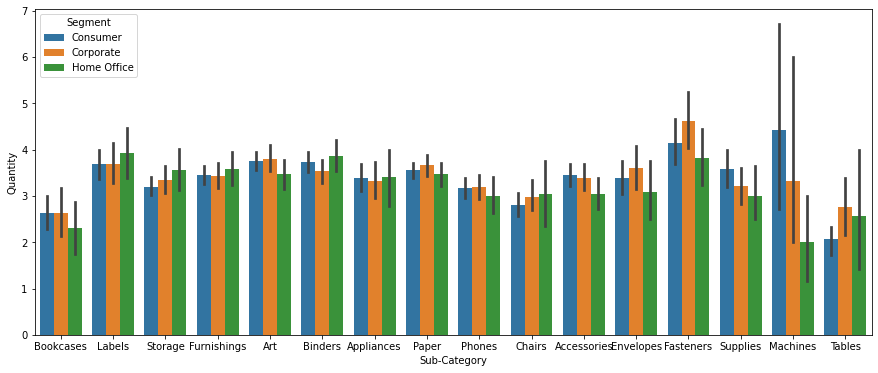

In [145]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sub-Category',y='Quantity',data=retail_data,hue='Segment')

## Insight 18: For the "Home Office" segment, sales quantity of machines must be increased as much as possible. Moreover, for "Consumer" segment, quantity of tables must be enhanced in order to expand their sales.

In [146]:
retail_data.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)

Sub-Category
Tables         0.211429
Chairs         0.184175
Machines       0.181250
Phones         0.166004
Bookcases      0.132929
Binders        0.131429
Accessories    0.090071
Envelopes      0.086636
Fasteners      0.082028
Paper          0.079000
Art            0.076056
Appliances     0.074286
Storage        0.073770
Supplies       0.071765
Labels         0.070690
Furnishings    0.063736
Name: Discount, dtype: float64

Text(0, 0.5, 'Discount')

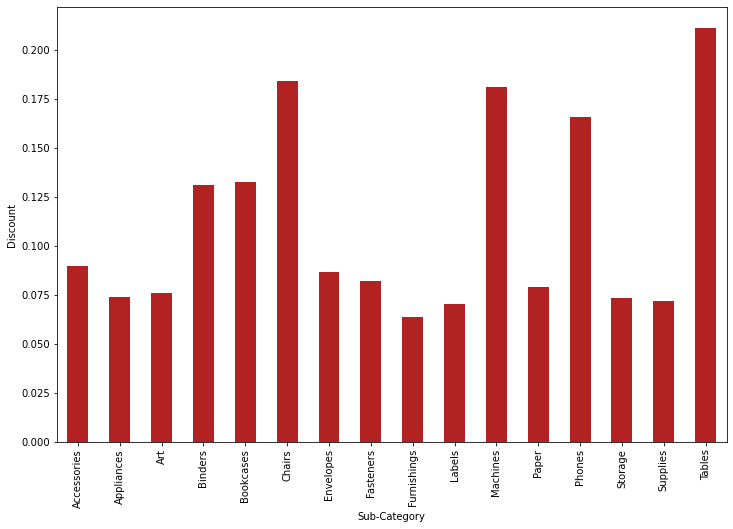

In [147]:
retail_data.groupby('Sub-Category')['Discount'].mean().plot(kind='bar',color='firebrick')
plt.ylabel('Discount')

## Insight 19: Discount must be reduced for all sales of "Tables" sub-category in order to maximize profits.

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

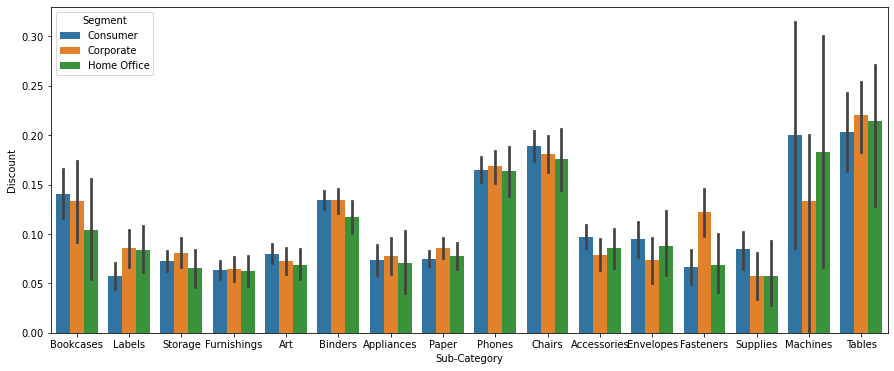

In [148]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sub-Category',y='Discount',data=retail_data,hue='Segment')

## Insight 20: For the "Chairs" sub-category, discount should be reduced in order to augment revenue from sales.

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

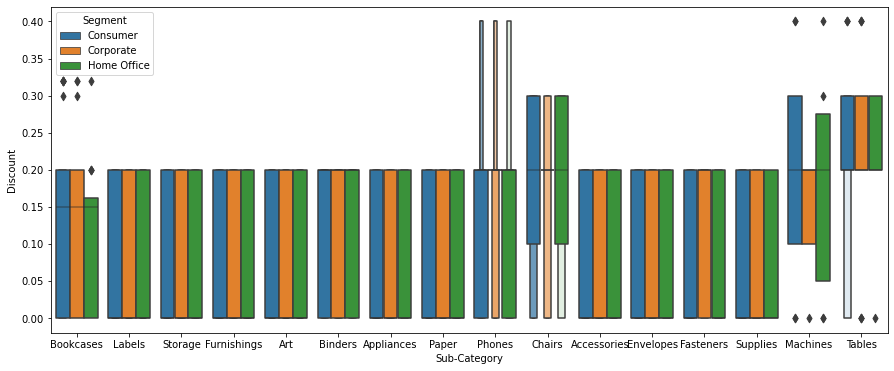

In [149]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Sub-Category',y='Discount',data=retail_data,hue='Segment')

## "Tables","Chairs","Phones" and "Machines" are mainly the sub-categories that generate maximum discount. It would be beneficial to reduce those discounts in order to intensify profit from sales.

In [150]:
retail_data.groupby('Sub-Category')['Profit'].mean().sort_values(ascending=False)

Sub-Category
Machines       30.747537
Appliances     17.851268
Accessories    15.728508
Phones         15.684930
Envelopes      14.984221
Paper          14.444283
Binders        13.729845
Furnishings    13.669980
Bookcases      11.192870
Labels          9.654427
Chairs          8.751667
Storage         8.530039
Art             6.910514
Supplies        5.604749
Fasteners       4.375660
Tables          3.208483
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit')

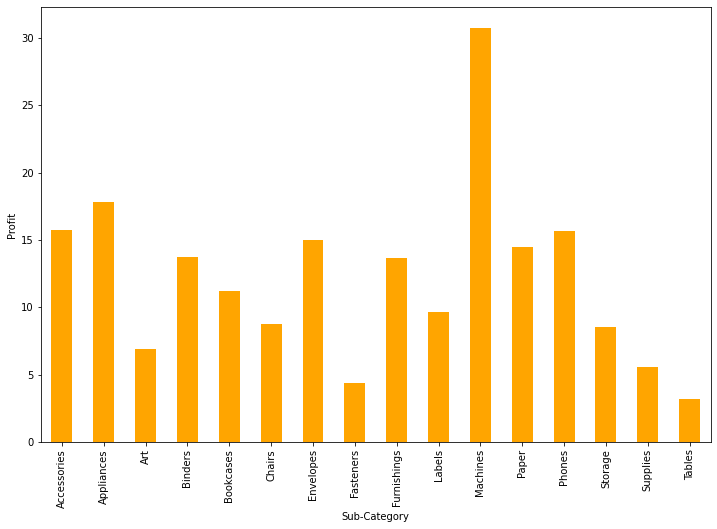

In [151]:
retail_data.groupby('Sub-Category')['Profit'].mean().plot(kind='bar',color='orange')
plt.ylabel('Profit')

## Machines generate the maximum profit, while tables generate the minimum.

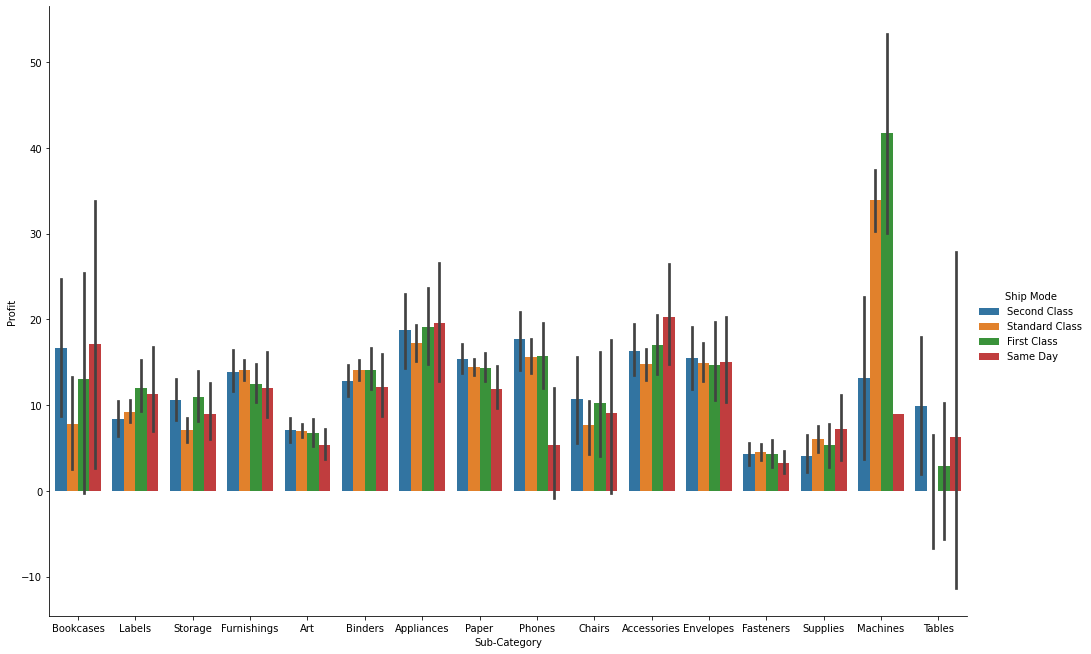

In [152]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,hue='Ship Mode',height=9,aspect=1.5,kind='bar')

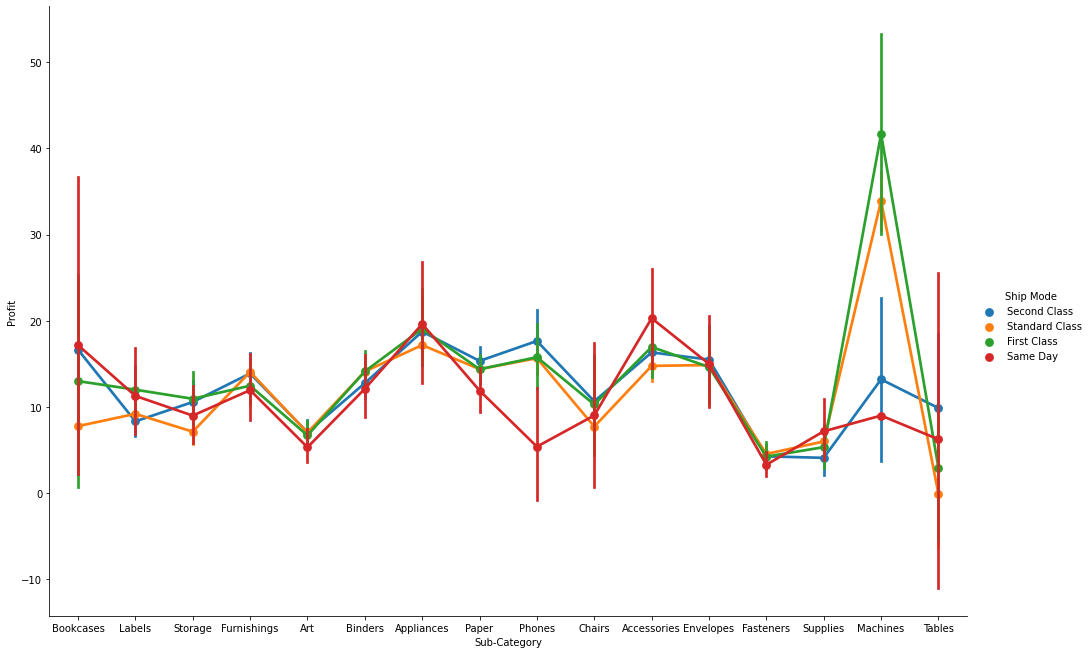

In [153]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,hue='Ship Mode',height=9,aspect=1.5,kind='point')

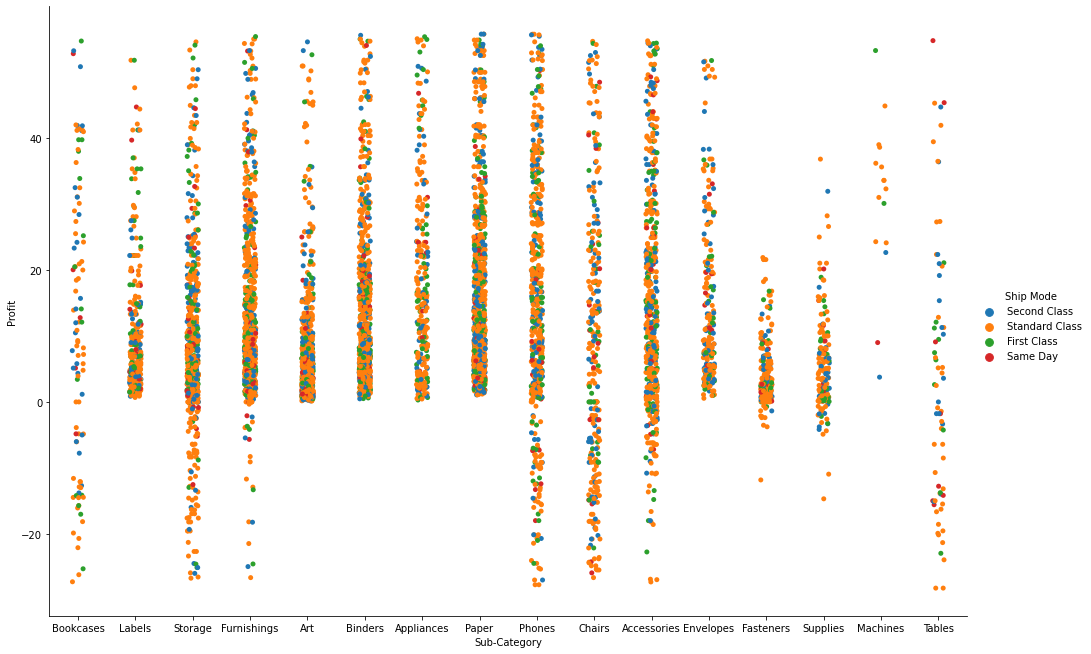

In [154]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,hue='Ship Mode',height=9,aspect=1.5,kind='strip')

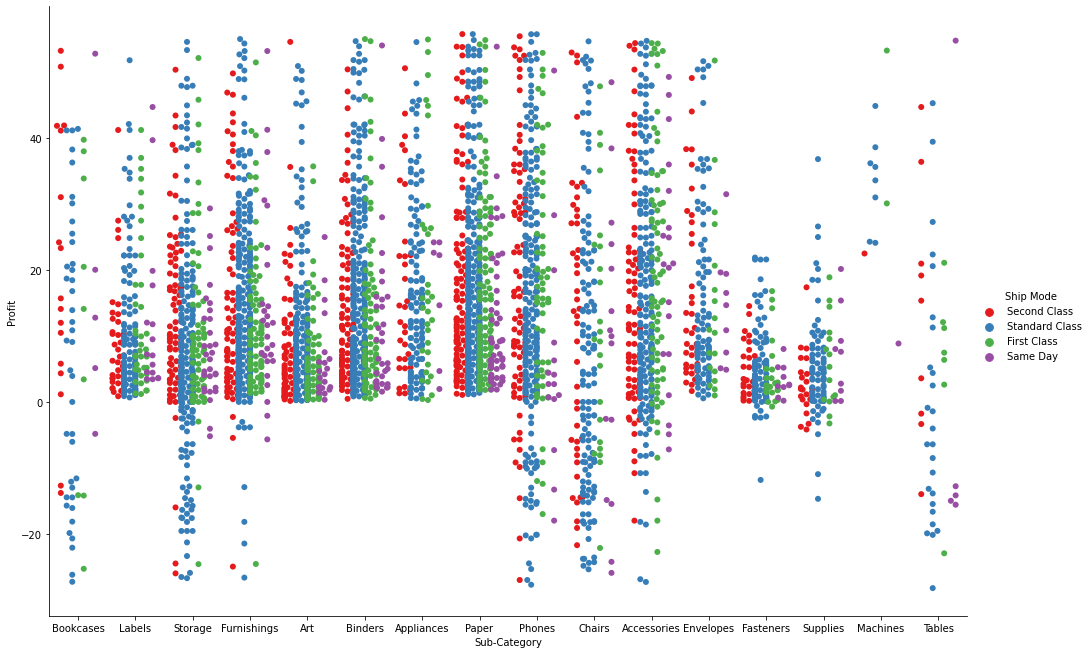

In [155]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data[:5000],hue='Ship Mode',height=9,aspect=1.5,kind='swarm',dodge=True,palette='Set1',n_boot=1200,s=6)

## Insight 21: The total profit for each of Tables, Arts, Fasteners and Supplies is very less so it is crucial to escalate sales for these sub-categories.

## Machines are generating the most profit from their sales.

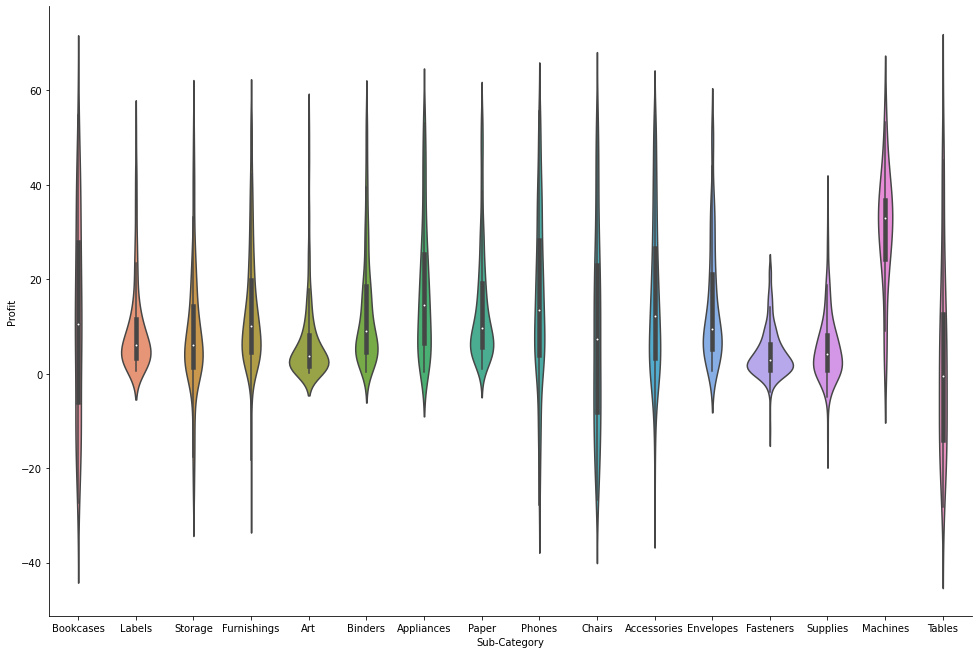

In [156]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,height=9,aspect=1.5,kind='violin')

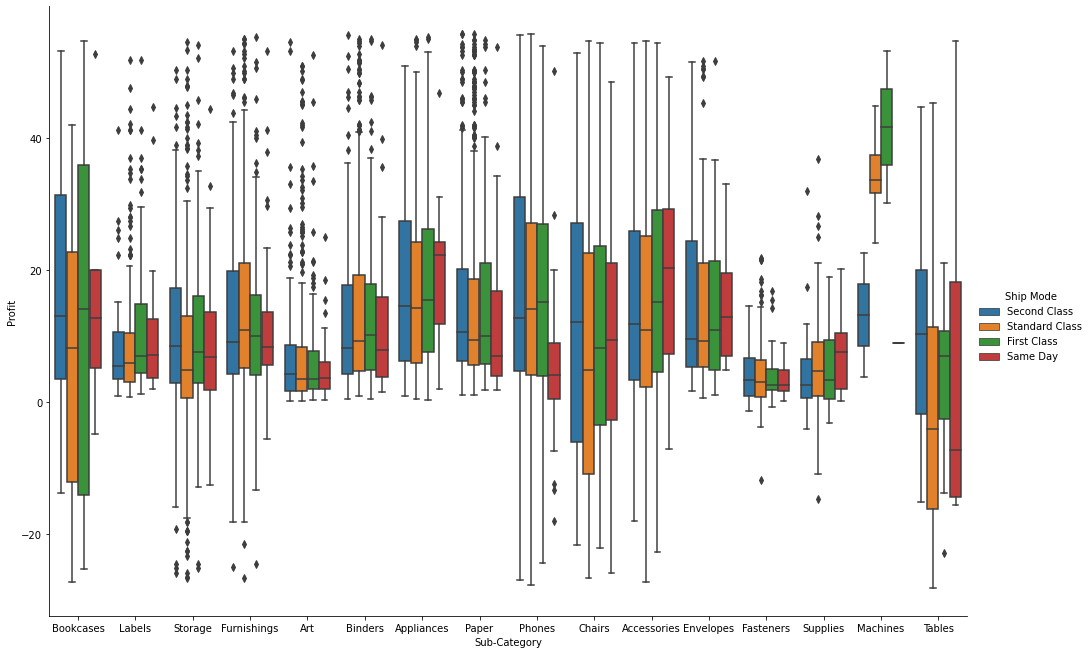

In [157]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,hue='Ship Mode',height=9,aspect=1.5,kind='box')

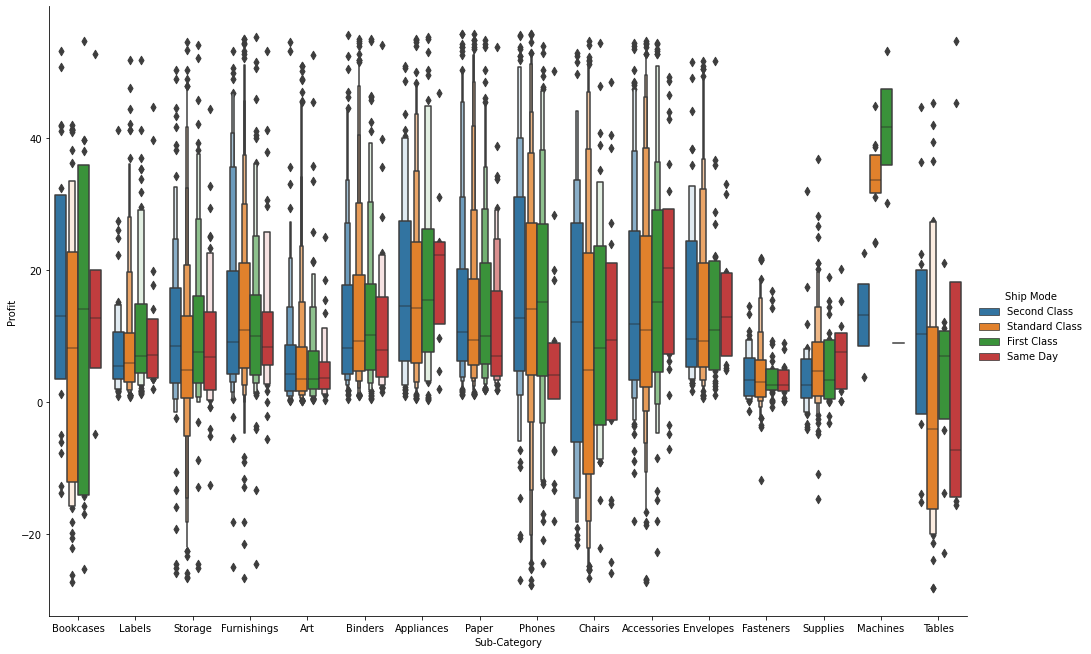

In [158]:
sns.catplot(x='Sub-Category',y='Profit',data=retail_data,hue='Ship Mode',height=9,aspect=1.5,kind='boxen')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

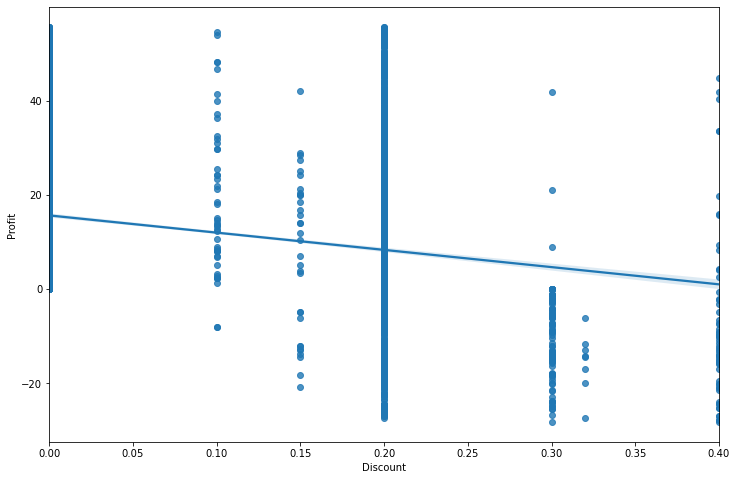

In [159]:
sns.regplot(x='Discount',y='Profit',data=retail_data)

## The negative slope of regression line clearly indicates that there is a negative correlation between discount and profit.

In [160]:
np.corrcoef(retail_data['Discount'],retail_data['Profit'])

array([[ 1.  , -0.27],
       [-0.27,  1.  ]])

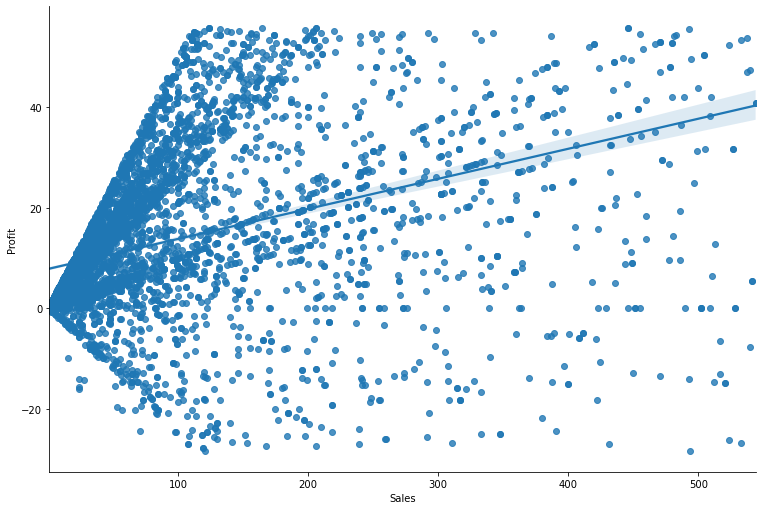

In [161]:
sns.lmplot(x='Sales',y='Profit',data=retail_data,height=7,aspect=1.5)

## Positive slope of linear regression line proves that there is positive correlation between sales and profit.

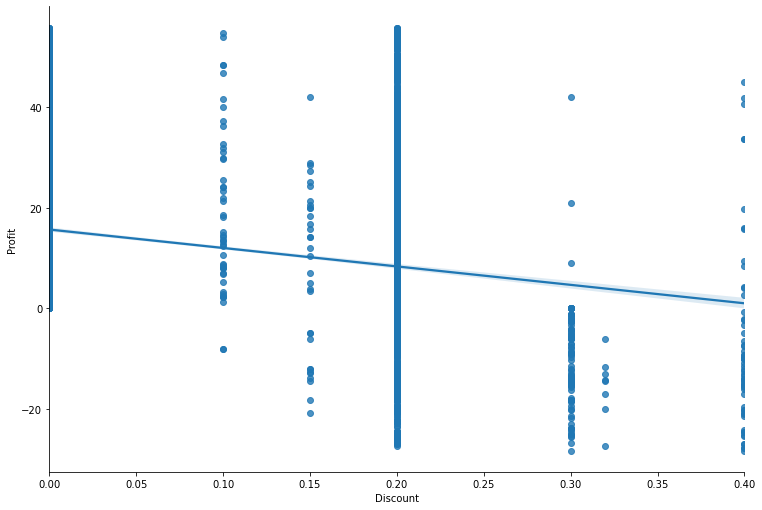

In [162]:
sns.lmplot(x='Discount',y='Profit',data=retail_data,height=7,aspect=1.5)

## As the linear regression model line has negative slope, so we can say that there is negative correlation between discount and profit i.e. As the discount is reduced, profit increases and vice versa.

# Multivariate Analysis

<Figure size 1440x960 with 0 Axes>

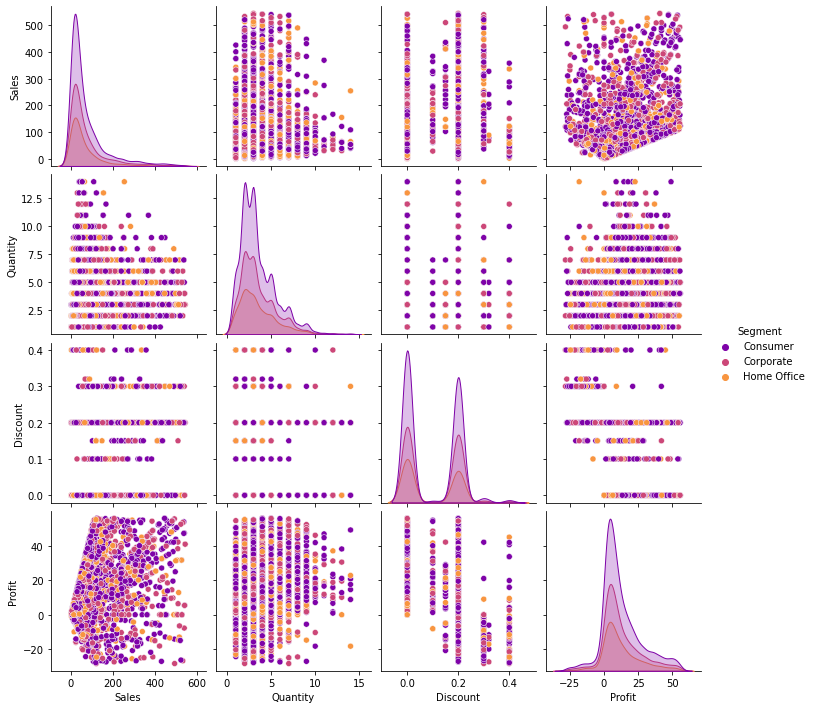

In [163]:
plt.figure(dpi=120)
sns.pairplot(retail_data,hue='Segment',palette='plasma')
plt.show()

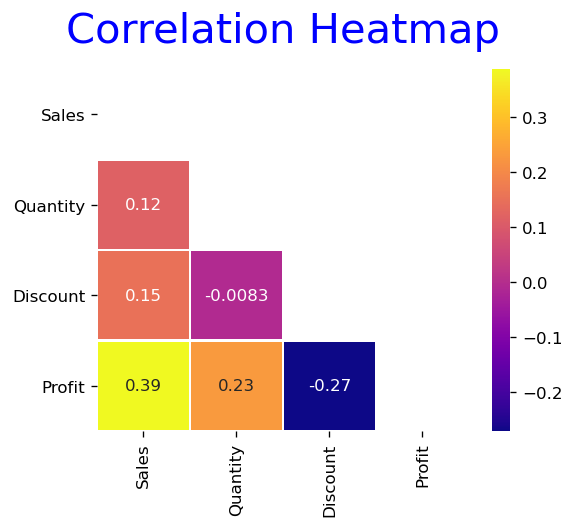

In [164]:
plt.figure(dpi=120,figsize=(5,4))
mask = np.triu(np.ones_like(retail_data.corr(),dtype=bool))
sns.heatmap(retail_data.corr(),mask=mask,annot=True,lw=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap',fontsize=25,color='blue',pad=16)
plt.show()

Correlation between Sales and Quantity ==> 0.11657269746398956


<Figure size 500x400 with 0 Axes>

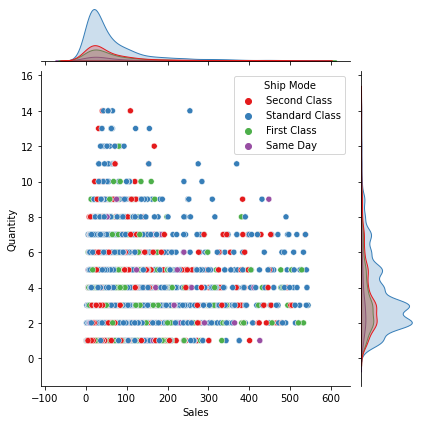

Correlation between Sales and Discount ==> 0.15220763136580415


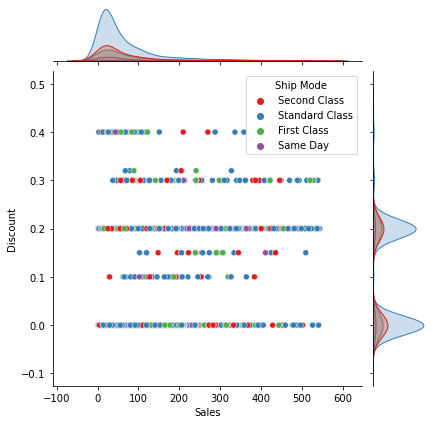

Correlation between Sales and Profit ==> 0.3880717876417585


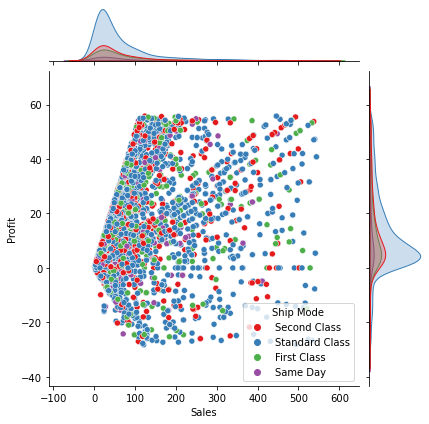

In [165]:
col = list(retail_data.columns)
idx = col.index('Sales')

plt.figure(dpi=100,figsize=(5,4))
for i in range(idx+1,len(col)):
    print("Correlation between Sales and {0} ==>".format(col[i]),retail_data.corr().loc['Sales'][col[i]])
    sns.jointplot(x='Sales',y=col[i],data=retail_data,kind='scatter',hue='Ship Mode',palette='Set1')
    plt.show()

Correlation between Quantity and Sales ==> 0.11657269746398956


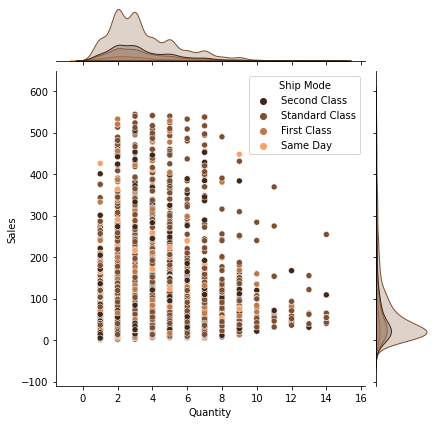

Correlation between Quantity and Discount ==> -0.008280028169488467


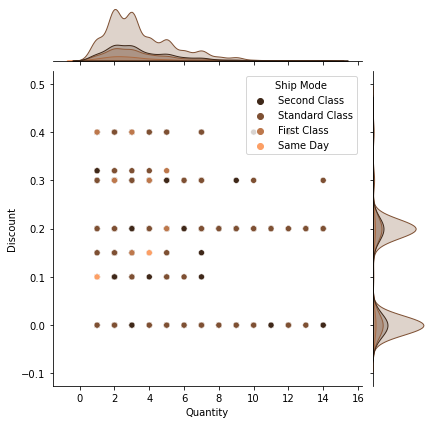

Correlation between Quantity and Profit ==> 0.2327954972109333


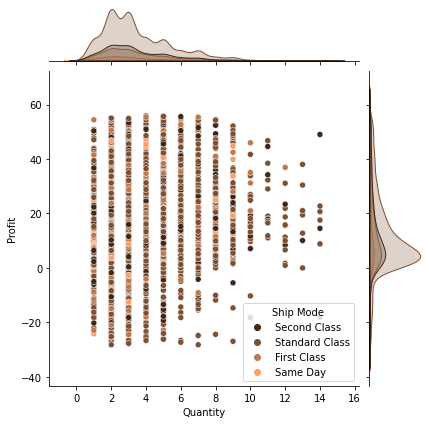

In [166]:
idx = col.index('Sales')
curr_idx = col.index('Quantity')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Quantity and {} ==>".format(col[i]),retail_data.corr().loc['Quantity'][col[i]])
        sns.jointplot(x='Quantity',y=col[i],data=retail_data,hue='Ship Mode',palette='copper')
        plt.show()

Correlation between Discount and Sales ==> 0.15220763136580415


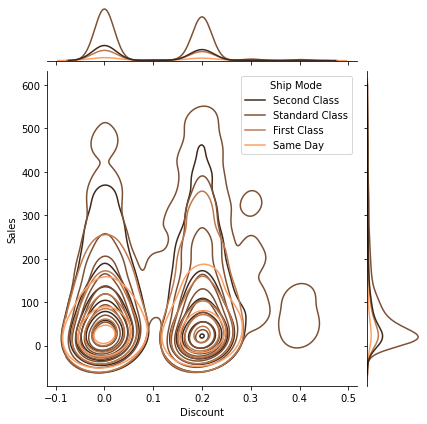

Correlation between Discount and Quantity ==> -0.008280028169488467


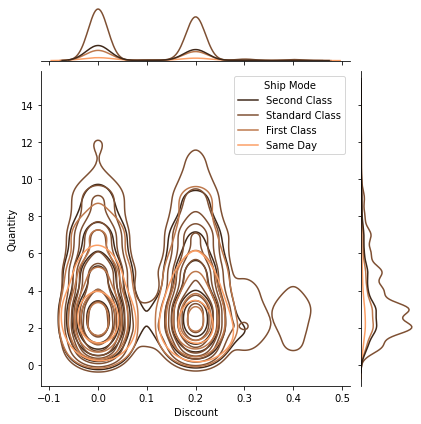

Correlation between Discount and Profit ==> -0.2709426720016807


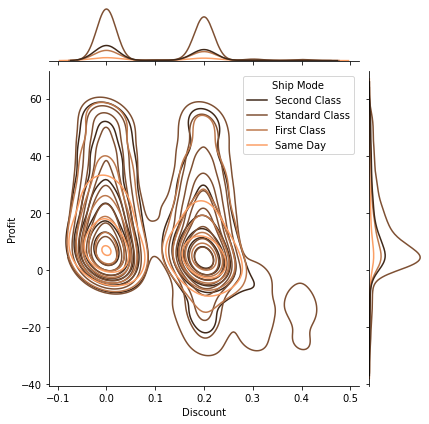

In [167]:
idx = col.index('Sales')
curr_idx = col.index('Discount')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Discount and {} ==>".format(col[i]),retail_data.corr().loc['Discount'][col[i]])
        sns.jointplot(x='Discount',y=col[i],data=retail_data,hue='Ship Mode',palette='copper',kind='kde')
        plt.show()

Correlation between Profit and Sales ==> 0.3880717876417585


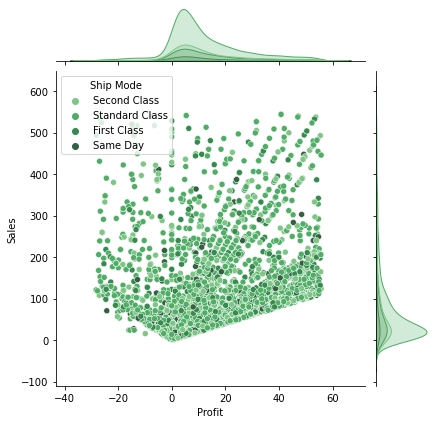

Correlation between Profit and Quantity ==> 0.2327954972109333


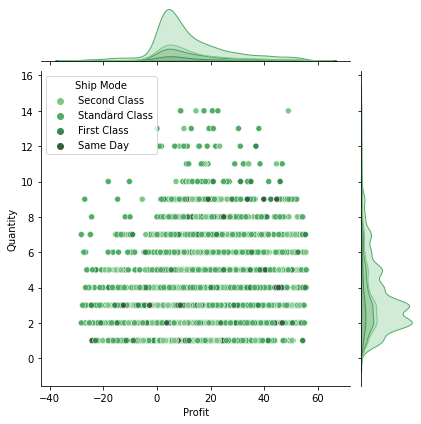

Correlation between Profit and Discount ==> -0.2709426720016807


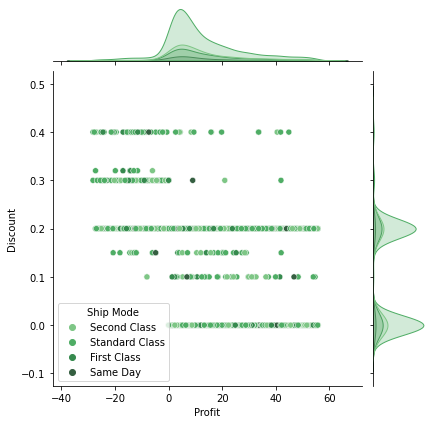

In [168]:
idx = col.index('Sales')
curr_idx = col.index('Profit')
for i in range(idx,len(col)):
    if i!=curr_idx:
        print("Correlation between Profit and {} ==>".format(col[i]),retail_data.corr().loc['Profit'][col[i]])
        sns.jointplot(x='Profit',y=col[i],data=retail_data,hue='Ship Mode',palette='Greens_d')
        plt.show()

## There is a mild positive correlation between quantity and profit i.e. on increasing quantity of sales, profit increases and vice versa.